In [1]:
#Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [2]:
#Veri Yükleme ve Temel İnceleme
try:
    df = pd.read_excel('Dermin Cilt Anketi (Yanıtlar) (1).xlsx', engine='openpyxl')
    df = df.drop(columns=['Adınız nedir? (opsiyonel)'])
    print("✅ Veri başarıyla yüklendi")
    print(f"📊 Veri boyutu: {df.shape}")
    print("\n📌 İlk 5 gözlem:")
    display(df.head())
except Exception as e:
    print(f"❌ Hata: {e}\n⚠️ Lütfen dosya yolunu kontrol edin")


✅ Veri başarıyla yüklendi
📊 Veri boyutu: (105, 19)

📌 İlk 5 gözlem:


,Zaman damgası,Kaç yaşındasınız?,Cinsiyetiniz nedir?,Cilt tipiniz nedir?,Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?,Cildiniz güneş ışığına karşı hassas mı?,"Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?",Kaşıntı yaşıyor musunuz?,Herhangi bir alerjiniz var mı?,Saç tipiniz nedir?,Hangi saç veya saç derisi sorunlarını yaşıyorsunuz?,Beslenme tipiniz nedir?,Günde ne kadar su içiyorsunuz?,Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?,Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?,Günde ortalama kaç sigara içiyorsunuz?,Herhangi bir kronik hastalığınız var mı?,Düzenli olarak ilaç kullanıyor musunuz?,Daha önce bir dermatoloğa gittiniz mi?
0,2025-07-27 14:35:10.311,21,Kadın,Karma,"Akne, Siyah nokta, Kızarıklık",Emin değilim,Hafif hassas,Hayır,Hayır,Normal,Diğer,Düzenli,1–2 litre,Haftada bir,0.0,0.0,Hayır,Hayır,Hayır
1,2025-07-27 14:37:59.043,22,Erkek,Karma,Siyah nokta,Hayır,Hayır,Ara sıra,Hayır,Normal,Diğer,Düzenli,2–3 litre,Düzenli egzersiz yapmıyorum,0.0,0.0,Hayır,Hayır,Hayır
2,2025-07-27 14:38:01.321,22,Erkek,Yağlı,"Akne, Siyah nokta",Evet,Hayır,Evet,Hayır,Yağlı,Saç dökülmesi,Düzenli,2–3 litre,Düzenli egzersiz yapmıyorum,0.0,0.0,Hayır,Hayır,Evet
3,2025-07-27 14:40:09.361,27,Kadın,Karma,Akne,Evet,Hafif hassas,Hayır,Emin değilim,Yağlı,"Kepek, Kaşıntı, Saç dökülmesi",Diğer,1 litreden az,Düzenli egzersiz yapmıyorum,0.0,0.0,Hayır,Hayır,Evet
4,2025-07-27 14:40:34.296,50,Kadın,Karma,"Kızarıklık, Diğer",Evet,Evet,Ara sıra,Emin değilim,Kuru,Saç dökülmesi,Düzenli,1–2 litre,Haftada 2–4 gün,0.0,0.0,Hayır,Hayır,Evet


In [3]:
df

,Zaman damgası,Kaç yaşındasınız?,Cinsiyetiniz nedir?,Cilt tipiniz nedir?,Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?,Cildiniz güneş ışığına karşı hassas mı?,"Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?",Kaşıntı yaşıyor musunuz?,Herhangi bir alerjiniz var mı?,Saç tipiniz nedir?,Hangi saç veya saç derisi sorunlarını yaşıyorsunuz?,Beslenme tipiniz nedir?,Günde ne kadar su içiyorsunuz?,Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?,Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?,Günde ortalama kaç sigara içiyorsunuz?,Herhangi bir kronik hastalığınız var mı?,Düzenli olarak ilaç kullanıyor musunuz?,Daha önce bir dermatoloğa gittiniz mi?
0,2025-07-27 14:35:10.311,21,Kadın,Karma,"Akne, Siyah nokta, Kızarıklık",Emin değilim,Hafif hassas,Hayır,Hayır,Normal,Diğer,Düzenli,1–2 litre,Haftada bir,0.0,0.0,Hayır,Hayır,Hayır
1,2025-07-27 14:37:59.043,22,Erkek,Karma,Siyah nokta,Hayır,Hayır,Ara sıra,Hayır,Normal,Diğer,Düzenli,2–3 litre,Düzenli egzersiz yapmıyorum,0.0,0.0,Hayır,Hayır,Hayır
2,2025-07-27 14:38:01.321,22,Erkek,Yağlı,"Akne, Siyah nokta",Evet,Hayır,Evet,Hayır,Yağlı,Saç dökülmesi,Düzenli,2–3 litre,Düzenli egzersiz yapmıyorum,0.0,0.0,Hayır,Hayır,Evet
3,2025-07-27 14:40:09.361,27,Kadın,Karma,Akne,Evet,Hafif hassas,Hayır,Emin değilim,Yağlı,"Kepek, Kaşıntı, Saç dökülmesi",Diğer,1 litreden az,Düzenli egzersiz yapmıyorum,0.0,0.0,Hayır,Hayır,Evet
4,2025-07-27 14:40:34.296,50,Kadın,Karma,"Kızarıklık, Diğer",Evet,Evet,Ara sıra,Emin değilim,Kuru,Saç dökülmesi,Düzenli,1–2 litre,Haftada 2–4 gün,0.0,0.0,Hayır,Hayır,Evet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2025-07-28 13:59:11.838,59,Erkek,Yağlı,"Akne, Siyah nokta",Hayır,Evet,Ara sıra,Hayır,Yağlı,"Kepek, Saç dökülmesi",Düzenli,2–3 litre,Haftada 2–4 gün,15.0,25.0,Evet,Evet,Hayır
101,2025-07-28 14:29:33.111,38,Kadın,Karma,"Akne, Siyah nokta",Evet,Evet,Evet,Hayır,Yağlı,Saç dökülmesi,Düzenli,1–2 litre,Düzenli egzersiz yapmıyorum,15.0,12.0,Hayır,Hayır,Evet
102,2025-07-28 15:10:01.696,55,Erkek,Normal,Siyah nokta,Evet,Hafif hassas,Evet,Evet,Normal,"Kepek, Kaşıntı, Saç dökülmesi, Kızarıklık",Düzenli,2–3 litre,Haftada 2–4 gün,0.0,0.0,Evet,Evet,Evet
103,2025-07-28 15:14:18.365,40,Erkek,Karma,"Akne, Siyah nokta",Hayır,Hayır,Hayır,Hayır,Yağlı,Kepek,Diğer,1–2 litre,Düzenli egzersiz yapmıyorum,1.0,0.0,Hayır,Evet,Evet


In [4]:
print("Mevcut sütunlar:")
print(df.columns.tolist())

Mevcut sütunlar:
['Zaman damgası', 'Kaç yaşındasınız?', 'Cinsiyetiniz nedir?', 'Cilt tipiniz nedir?', 'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?', 'Cildiniz güneş ışığına karşı hassas mı?', 'Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?', 'Kaşıntı yaşıyor musunuz?', 'Herhangi bir alerjiniz var mı?', 'Saç tipiniz nedir?', 'Hangi saç veya saç derisi sorunlarını yaşıyorsunuz?', 'Beslenme tipiniz nedir?', 'Günde ne kadar su içiyorsunuz?', 'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?', 'Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?', 'Günde ortalama kaç sigara içiyorsunuz?', 'Herhangi bir kronik hastalığınız var mı?', 'Düzenli olarak ilaç kullanıyor musunuz?', 'Daha önce bir dermatoloğa gittiniz mi?']


In [5]:
#Eksik Veri Analizi
print("\n🔍 Eksik veri analizi:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])



🔍 Eksik veri analizi:
Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?         7
Cildiniz güneş ışığına karşı hassas mı?                1
Kaşıntı yaşıyor musunuz?                               1
Hangi saç veya saç derisi sorunlarını yaşıyorsunuz?    7
Beslenme tipiniz nedir?                                1
Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?    6
Günde ortalama kaç sigara içiyorsunuz?                 6
Herhangi bir kronik hastalığınız var mı?               1
dtype: int64


In [6]:
# Kategorik değişkenlerdeki eksikler
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna('Bilinmiyor')
    df[col] = df[col].replace('Emin değilim', 'Bilinmiyor')

In [7]:
# Sayısal değişkenlerdeki eksikler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print("\n✅ Eksik veriler düzeltildi")


✅ Eksik veriler düzeltildi


In [8]:
#Veri Tiplerini Düzenleme
# Ordinal değişkenleri kategorik yapalım
ordinal_cols = [
    'Günde ne kadar su içiyorsunuz?',
    'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?',
    'Cildiniz güneş ışığına karşı hassas mı?',
    'Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?',
    'Kaşıntı yaşıyor musunuz?'
]

for col in ordinal_cols:
    df[col] = df[col].astype('category')

print("\n📊 Veri tipleri:")
print(df.dtypes)



📊 Veri tipleri:
Zaman damgası                                                                            datetime64[ns]
Kaç yaşındasınız?                                                                                 int64
Cinsiyetiniz nedir?                                                                              object
Cilt tipiniz nedir?                                                                              object
Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?                                                   object
Cildiniz güneş ışığına karşı hassas mı?                                                        category
Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?          category
Kaşıntı yaşıyor musunuz?                                                                       category
Herhangi bir alerjiniz var mı?                                                                   object
Saç tipiniz nedir?                             

In [9]:
# Ordinal Encoding
# Kategori sıralamalarını tanımla
ordinal_mappings = {
    'Günde ne kadar su içiyorsunuz?': ['1 litreden az', '1–2 litre', '2–3 litre', '3 litreden fazla'],
    'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?': ['Düzenli egzersiz yapmıyorum', 'Haftada bir', 'Haftada 2–4 gün', 'Haftada 5–7 gün'],
    'Cildiniz güneş ışığına karşı hassas mı?': ['Hayır', 'Hafif hassas', 'Evet'],
    'Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?': ['Hayır', 'Hafif hassas', 'Evet'],
    'Kaşıntı yaşıyor musunuz?': ['Hayır', 'Ara sıra', 'Evet']
}


In [10]:
# Kategorilere sıralama ata
for col in ordinal_cols:
    df[col] = df[col].cat.set_categories(
        ordinal_mappings[col],
        ordered=True
    )

In [11]:
# Kategorik kodlara dönüştür (string -> sayısal)
df[ordinal_cols] = df[ordinal_cols].apply(lambda x: x.cat.codes)

In [12]:
# Eksik kodları (-1) en yaygın değerle değiştir
for col in ordinal_cols:
    df[col] = df[col].replace(-1, df[col].mode()[0])
    print("\n✅ Ordinal kodlama tamamlandı")
print(df[ordinal_cols].head())


✅ Ordinal kodlama tamamlandı

✅ Ordinal kodlama tamamlandı

✅ Ordinal kodlama tamamlandı

✅ Ordinal kodlama tamamlandı

✅ Ordinal kodlama tamamlandı
   Günde ne kadar su içiyorsunuz?  \
0                               1   
1                               2   
2                               2   
3                               0   
4                               1   

   Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?  \
0                                                  1     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  2     

   Cildiniz güneş ışığına karşı hassas mı?  \
0                                        2   
1                                        0   
2                                        2   
3                                        2   
4                                        2   

 

In [13]:
#Label Encoding
label_cols = ['Cinsiyetiniz nedir?', 'Saç tipiniz nedir?', 'Beslenme tipiniz nedir?', 
             'Daha önce bir dermatoloğa gittiniz mi?']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [14]:
#One-Hot Encoding
onehot_cols = [
    'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?',
    'Hangi saç veya saç derisi sorunlarını yaşıyorsunuz?',
    'Herhangi bir alerjiniz var mı?',
    'Herhangi bir kronik hastalığınız var mı?',
    'Düzenli olarak ilaç kullanıyor musunuz?'
]

for col in onehot_cols:
    # Çoklu cevapları işle (virgülle ayrılmış)
    expanded = df[col].str.get_dummies(', ')
    expanded.columns = [f"{col}_{x.strip()}" for x in expanded.columns]
    df = pd.concat([df, expanded], axis=1)
    df = df.drop(col, axis=1)

print("\n✅ Tüm kodlama işlemleri tamamlandı")


✅ Tüm kodlama işlemleri tamamlandı


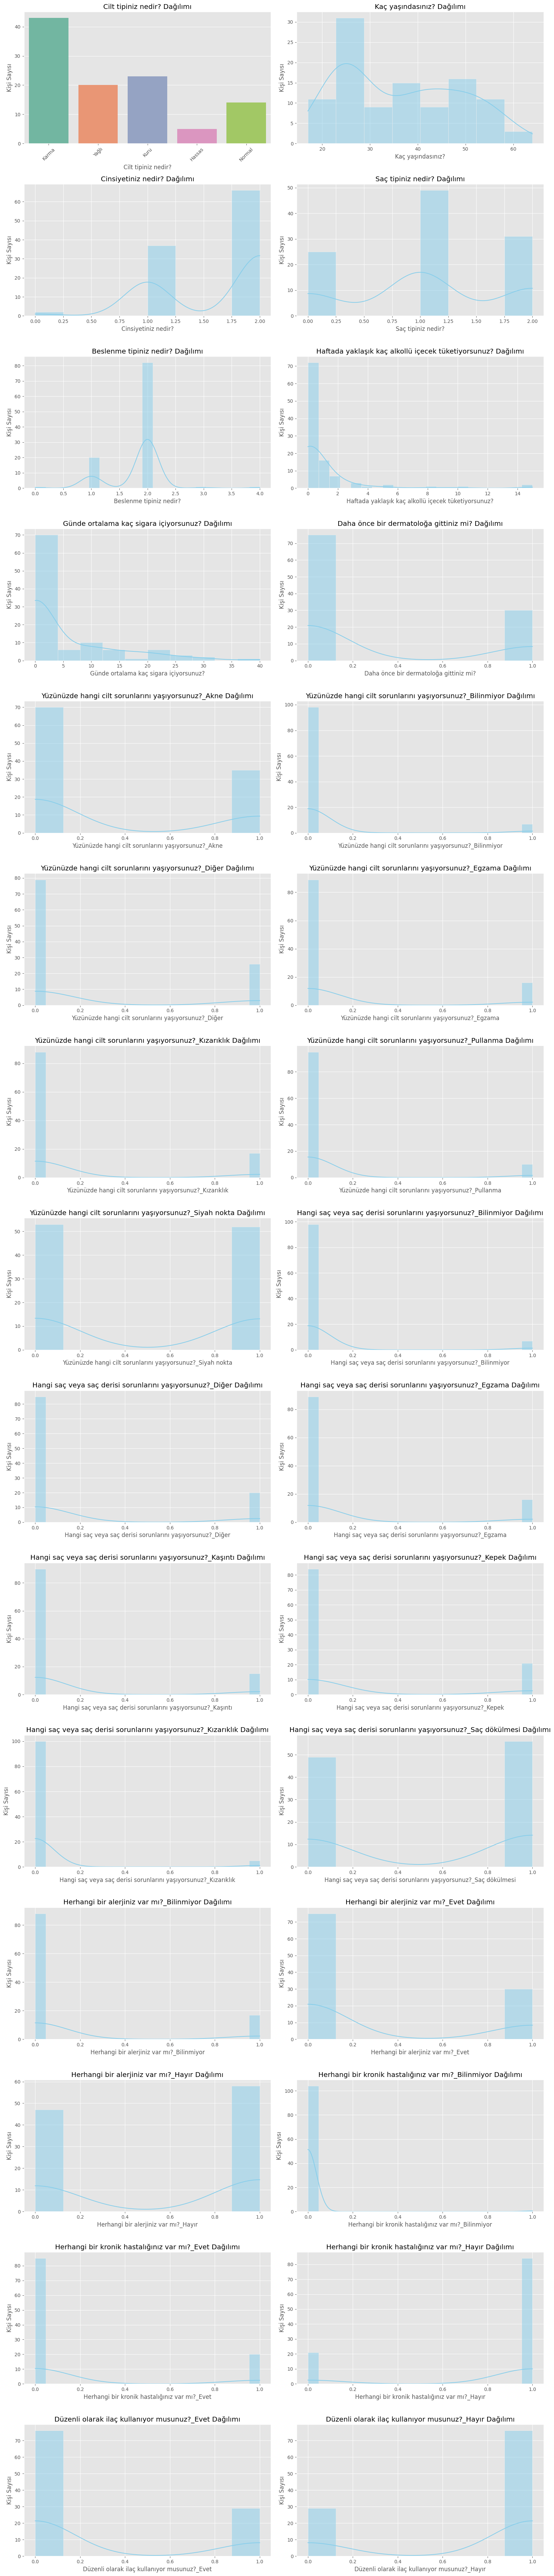

In [15]:
# Keşifsel Veri Analizi (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Kategorik ve sayısal sütunları ayır
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Toplam grafik sayısı
total_vars = len(cat_cols) + len(num_cols)
cols = 2
rows = (total_vars + 1) // cols

# Grafik alanı oluştur
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

# Kategorik değişkenler için çubuk grafik
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} Dağılımı')
    axes[i].set_ylabel('Kişi Sayısı')
    axes[i].tick_params(axis='x', rotation=45)

# Sayısal değişkenler için histogram + KDE
for j, col in enumerate(num_cols):
    idx = j + len(cat_cols)
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{col} Dağılımı')
    axes[idx].set_ylabel('Kişi Sayısı')

# Boş kalan grafik kutularını kaldır
for k in range(total_vars, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()



In [16]:
df.columns

Index(['Zaman damgası', 'Kaç yaşındasınız?', 'Cinsiyetiniz nedir?',
       'Cilt tipiniz nedir?', 'Cildiniz güneş ışığına karşı hassas mı?',
       'Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?',
       'Kaşıntı yaşıyor musunuz?', 'Saç tipiniz nedir?',
       'Beslenme tipiniz nedir?', 'Günde ne kadar su içiyorsunuz?',
       'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?',
       'Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?',
       'Günde ortalama kaç sigara içiyorsunuz?',
       'Daha önce bir dermatoloğa gittiniz mi?',
       'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?_Akne',
       'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?_Bilinmiyor',
       'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?_Diğer',
       'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?_Egzama',
       'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?_Kızarıklık',
       'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?_Pullanma',
       'Yüzünüzde hangi c

array([[<Axes: title={'center': 'Zaman damgası'}>,
        <Axes: title={'center': 'Kaç yaşındasınız?'}>,
        <Axes: title={'center': 'Cinsiyetiniz nedir?'}>,
        <Axes: title={'center': 'Cildiniz güneş ışığına karşı hassas mı?'}>,
        <Axes: title={'center': 'Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?'}>,
        <Axes: title={'center': 'Kaşıntı yaşıyor musunuz?'}>],
       [<Axes: title={'center': 'Saç tipiniz nedir?'}>,
        <Axes: title={'center': 'Beslenme tipiniz nedir?'}>,
        <Axes: title={'center': 'Günde ne kadar su içiyorsunuz?'}>,
        <Axes: title={'center': 'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?'}>,
        <Axes: title={'center': 'Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?'}>,
        <Axes: title={'center': 'Günde ortalama kaç sigara içiyorsunuz?'}>],
       [<Axes: title={'center': 'Daha önce bir dermatoloğa gittiniz mi?'}>,
        <Axes: title={'center': 'Yüzünüzde hangi cilt soru

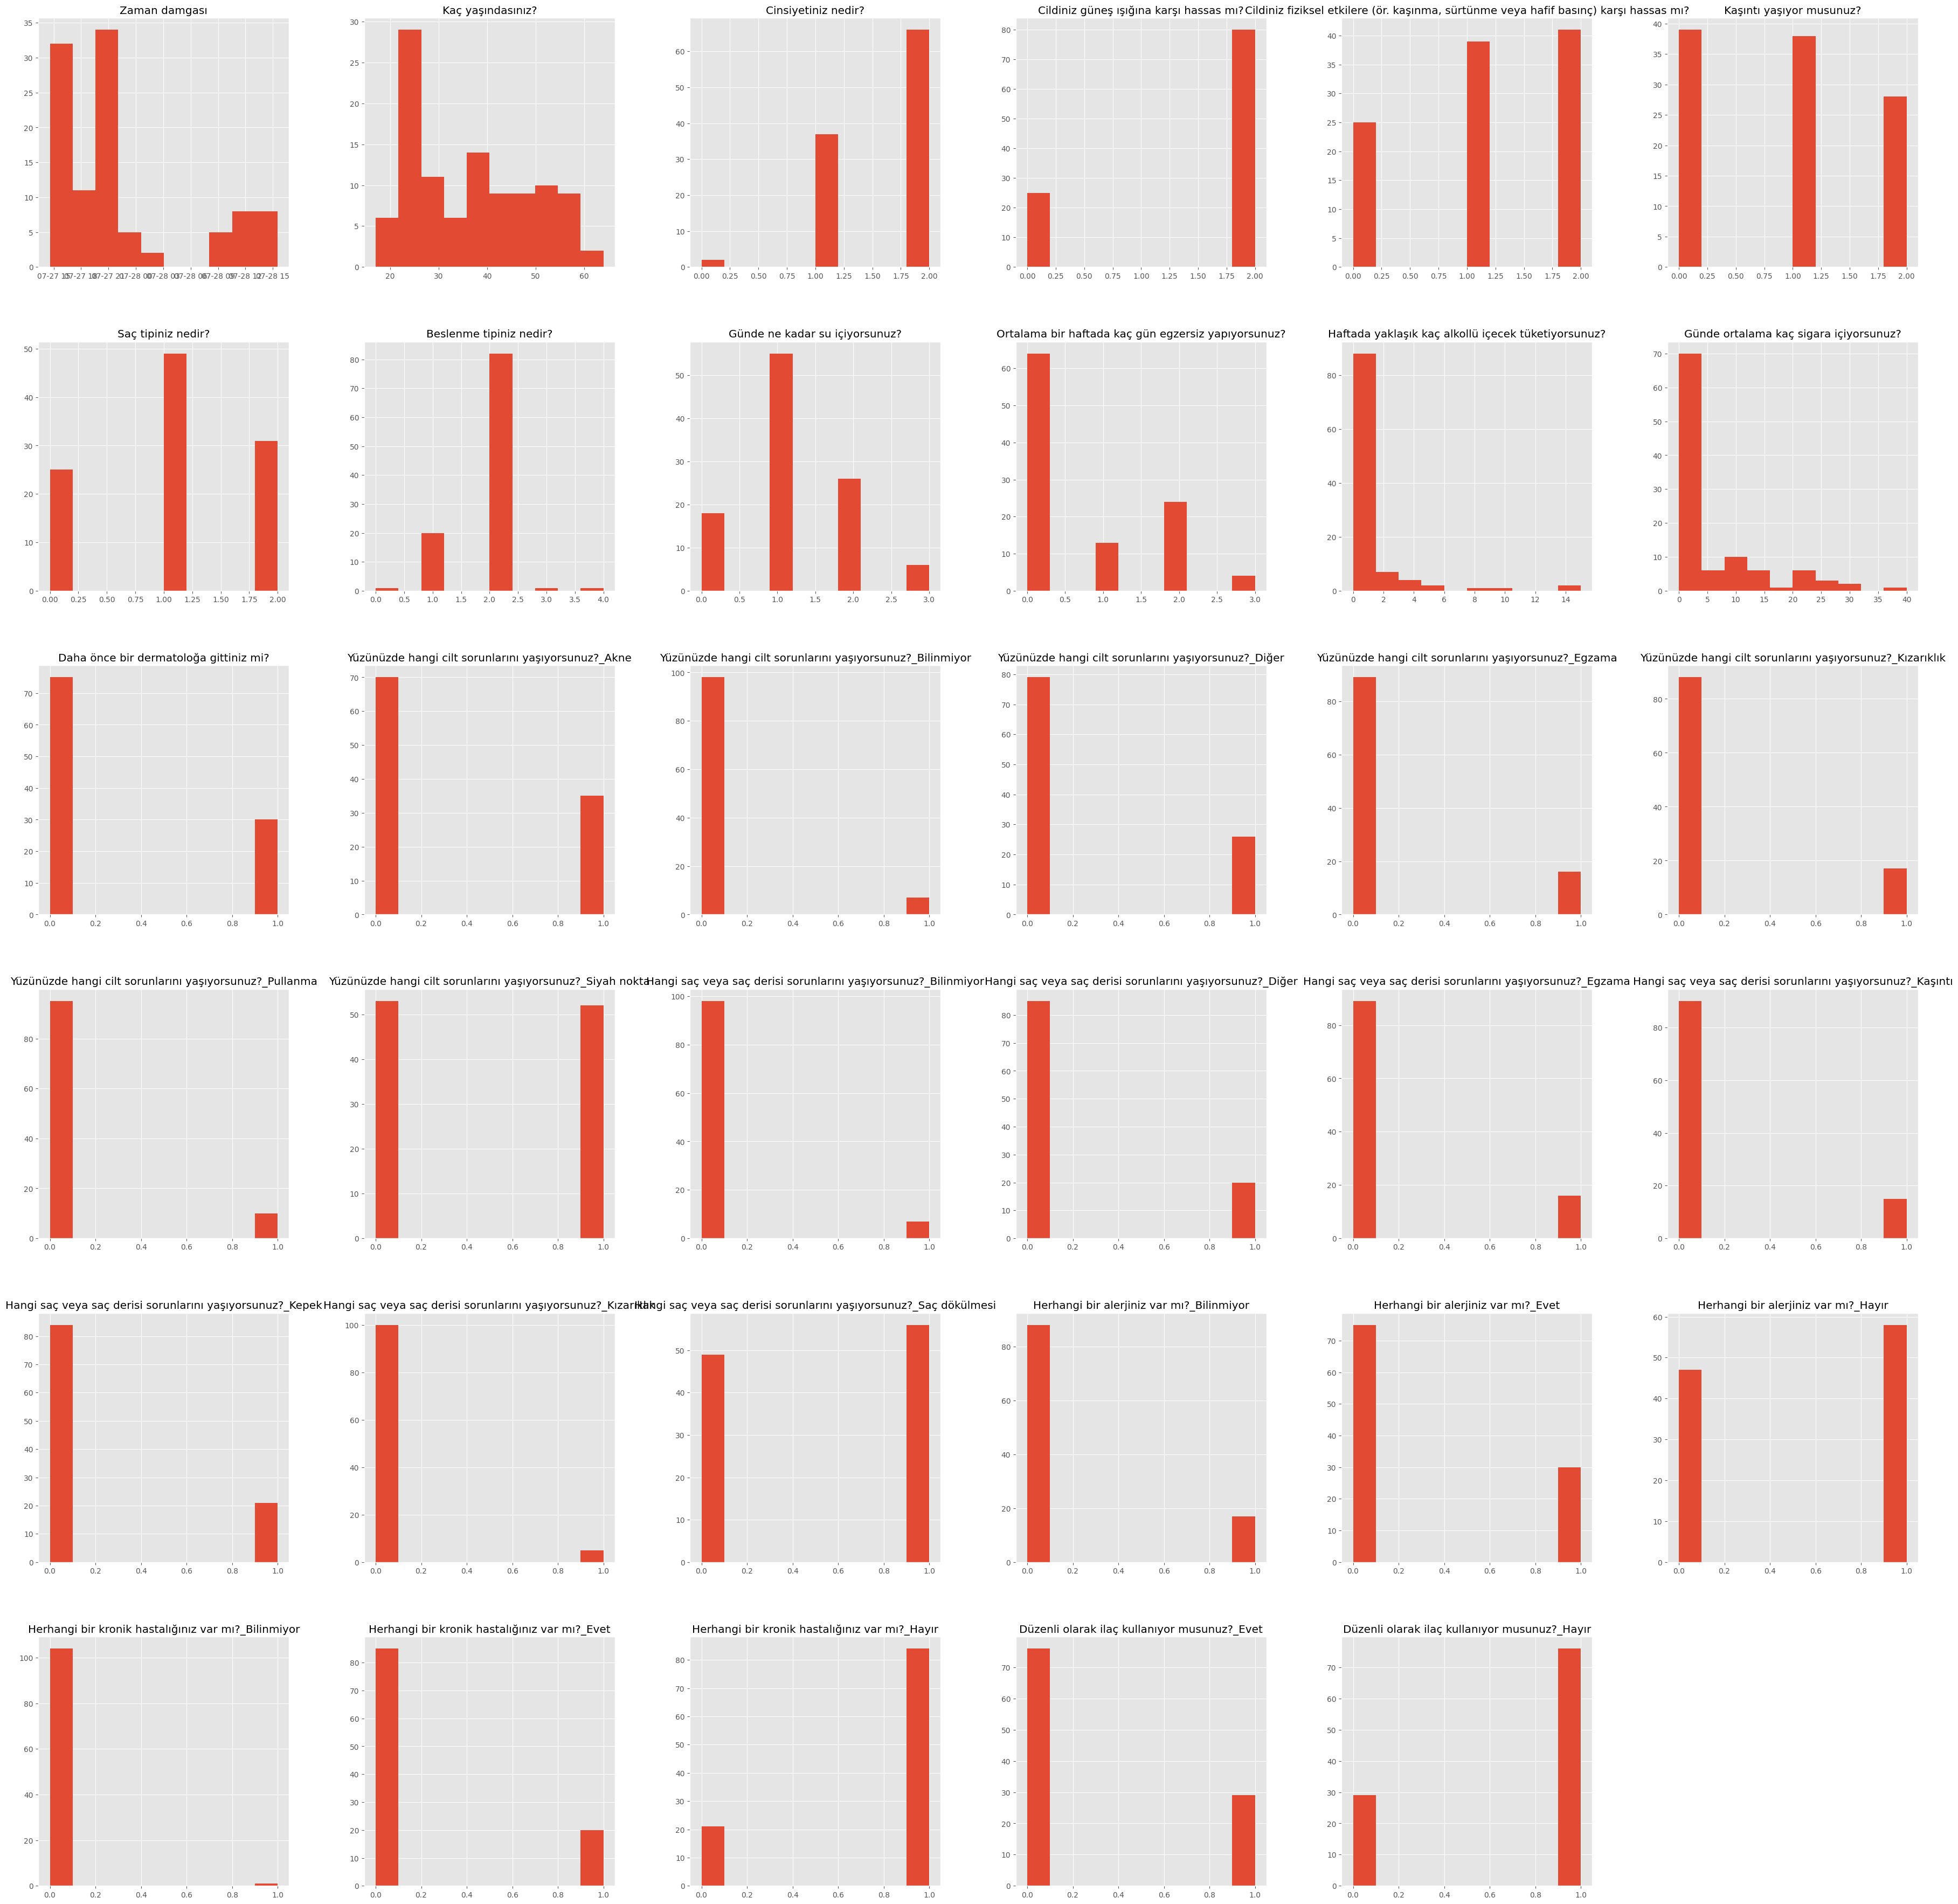

In [17]:
df.hist(figsize=(45, 45))

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Veri yükleme
df = pd.read_excel('Dermin Cilt Anketi (Yanıtlar) (1).xlsx', engine='openpyxl')
df = df.drop(columns=['Adınız nedir? (opsiyonel)'])

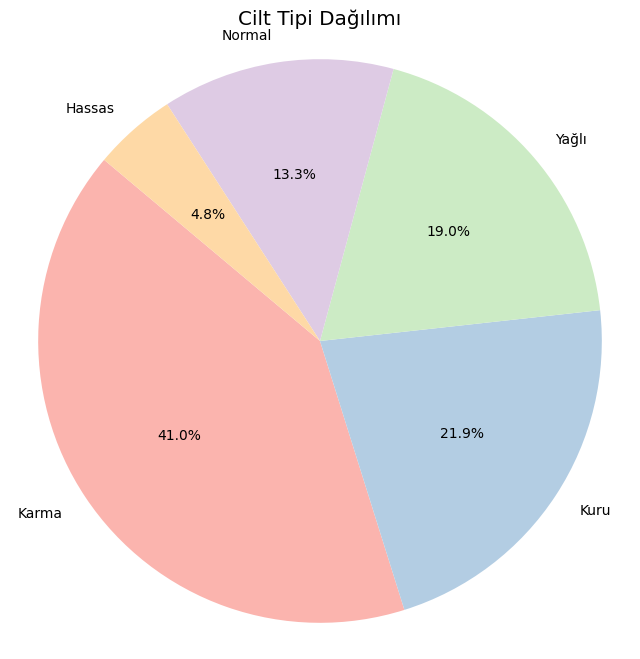

In [19]:
import matplotlib.pyplot as plt

# Cilt tipi dağılımı sayım
cilt_tipleri = df['Cilt tipiniz nedir?'].value_counts()

# Pasta grafiği
plt.figure(figsize=(8, 8))
plt.pie(cilt_tipleri, labels=cilt_tipleri.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Cilt Tipi Dağılımı')
plt.axis('equal')  
plt.show()


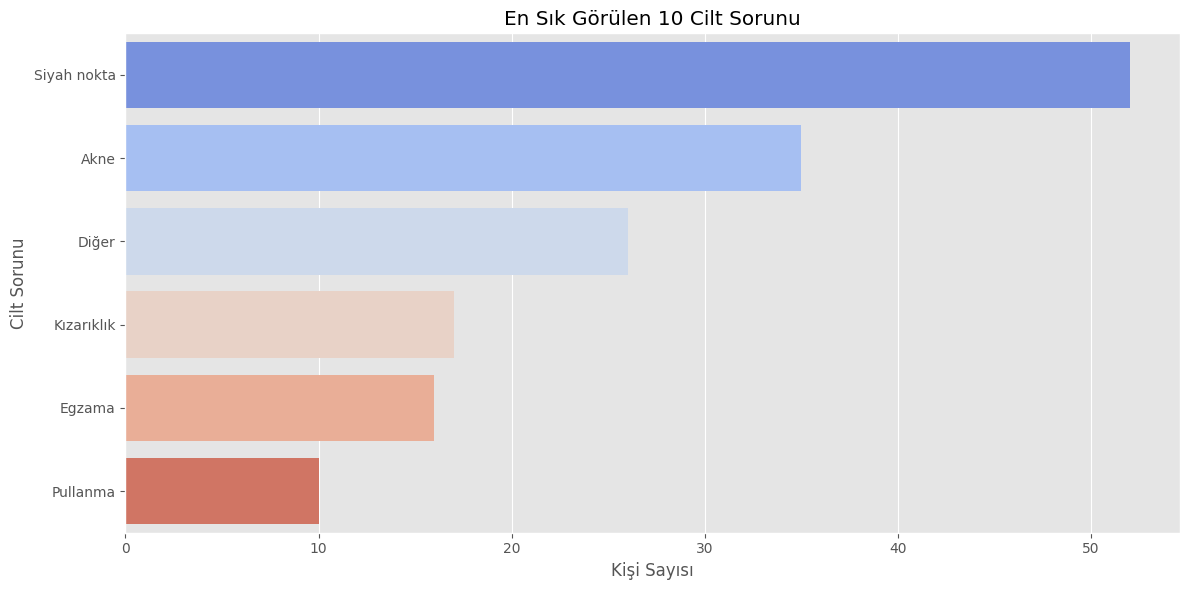

In [20]:
from collections import Counter
from itertools import chain

sorunlar = df['Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?'].dropna().str.split(',')
sorunlar = list(chain.from_iterable(sorunlar))
sorunlar = [s.strip() for s in sorunlar if isinstance(s, str)]

sorun_freq = Counter(sorunlar).most_common(10)
sorun_df = pd.DataFrame(sorun_freq, columns=['Sorun', 'Frekans'])

sns.barplot(data=sorun_df, x='Frekans', y='Sorun', palette='coolwarm')
plt.title('En Sık Görülen 10 Cilt Sorunu')
plt.xlabel('Kişi Sayısı')
plt.ylabel('Cilt Sorunu')
plt.tight_layout()
plt.show()


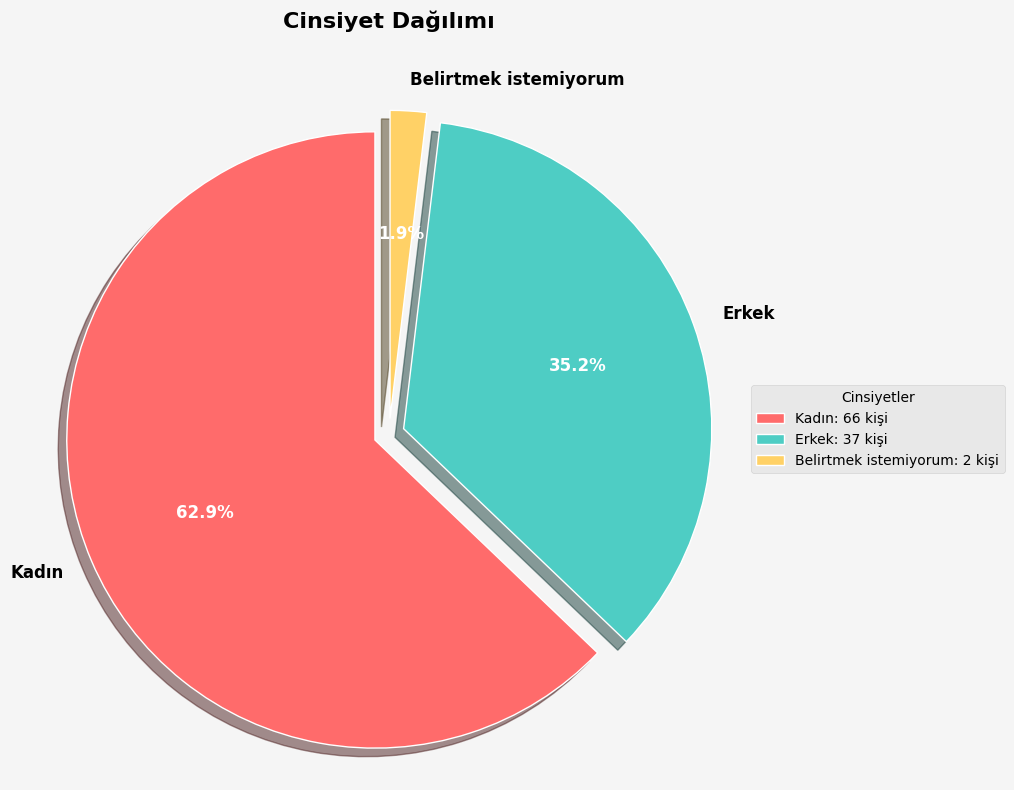

In [21]:
# Cinsiyet dağılımı doğrudan etiketlerle alınır
gender_counts = df['Cinsiyetiniz nedir?'].value_counts()

# Renk paleti (kadın, erkek, belirtmeyen sırayla)
colors = ['#FF6B6B', '#4ECDC4', '#FFD166']
explode = (0.05,) * len(gender_counts)

# Pasta grafiği oluştur
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    colors=colors[:len(gender_counts)],
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Başlık
plt.title('Cinsiyet Dağılımı\n', fontsize=16, fontweight='bold', pad=20)

# Yüzdeleri beyaz ve büyük yap
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

# Açıklama kutusu (kaç kişi olduğunu yaz)
plt.legend(
    title="Cinsiyetler",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    labels=[f"{label}: {count} kişi" for label, count in gender_counts.items()]
)

plt.axis('equal')  
plt.gcf().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()


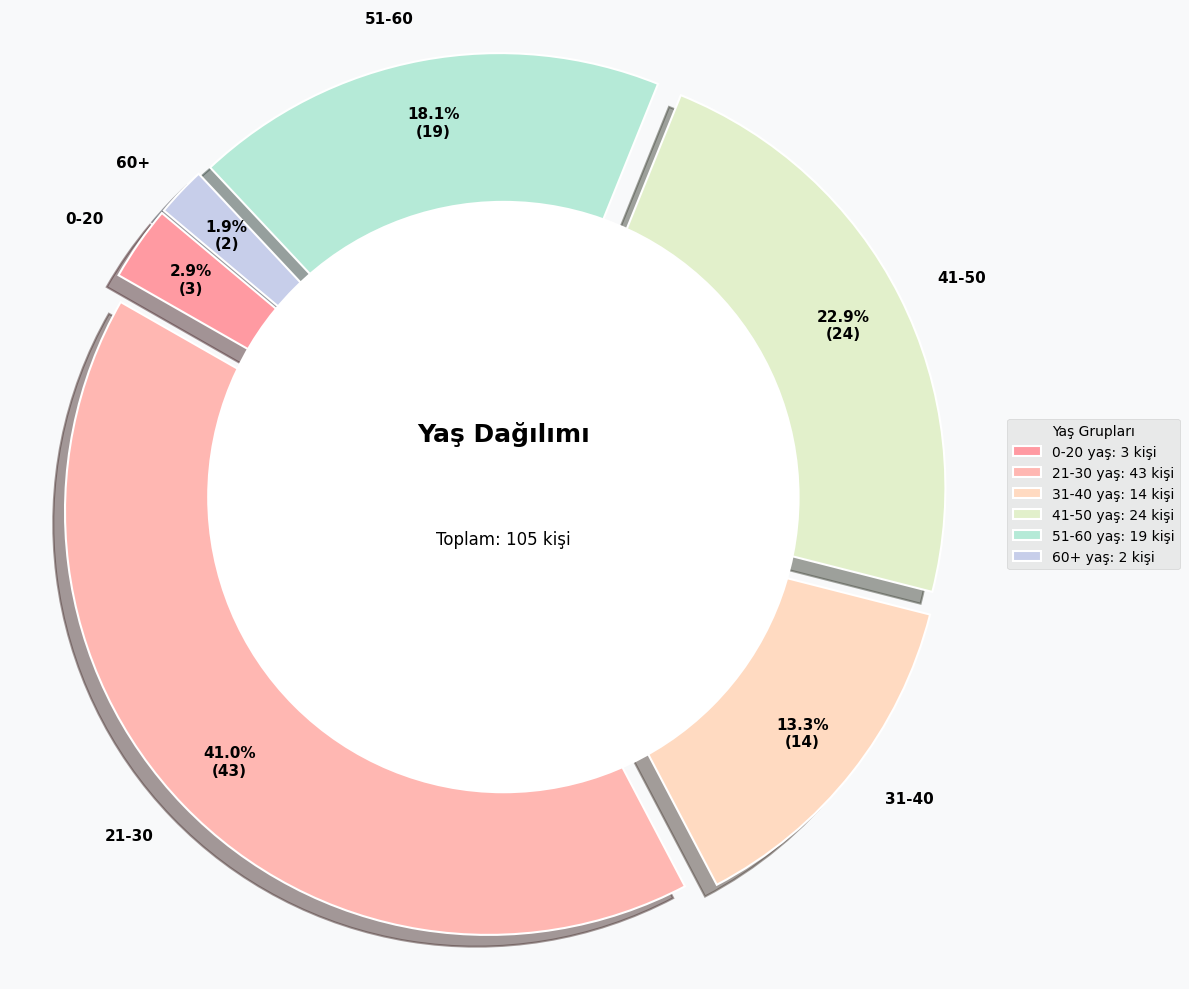

In [22]:
# Yaş aralıklarını belirle
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['Yaş Grubu'] = pd.cut(df['Kaç yaşındasınız?'], bins=bins, labels=labels, right=False)

# Yaş gruplarının dağılımını hesapla
age_counts = df['Yaş Grubu'].value_counts().sort_index()

# Renk paleti
colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pasta grafiği oluştur (DÜZELTİLMİŞ)
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(
    age_counts,
    labels=age_counts.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(age_counts)/100)})',  # Kapanış parantezi eklendi
    startangle=140,
    explode=explode,
    shadow=True,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 11, 'fontweight': 'bold'},
    pctdistance=0.85
)

# Grafik öğelerini özelleştir
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.text(0, 0.15, "Yaş Dağılımı", ha='center', va='center', fontsize=18, fontweight='bold')
plt.text(0, -0.1, f"Toplam: {len(df)} kişi", ha='center', va='center', fontsize=12)

# Lejant ekle
legend_labels = [f"{label} yaş: {count} kişi" for label, count in zip(age_counts.index, age_counts)]
plt.legend(
    wedges,
    legend_labels,
    title="Yaş Grupları",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.gcf().set_facecolor('#f8f9fa')
plt.axis('equal')
plt.tight_layout()
plt.show()

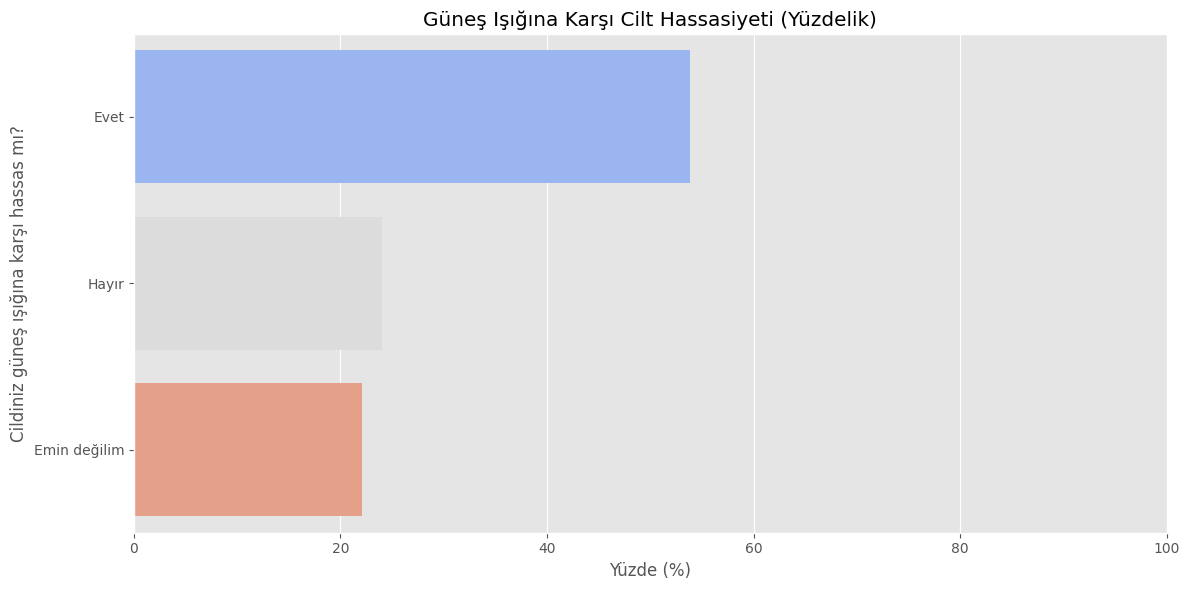

In [23]:
# Hassasiyet verisini say
hassasiyet_counts = df['Cildiniz güneş ışığına karşı hassas mı?'].value_counts()

# Yüzdelere çevir
hassasiyet_percent = (hassasiyet_counts / hassasiyet_counts.sum()) * 100

# Grafik
sns.barplot(
    x=hassasiyet_percent.values,
    y=hassasiyet_percent.index,
    palette='coolwarm'
)
plt.xlabel('Yüzde (%)')
plt.title('Güneş Işığına Karşı Cilt Hassasiyeti (Yüzdelik)')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


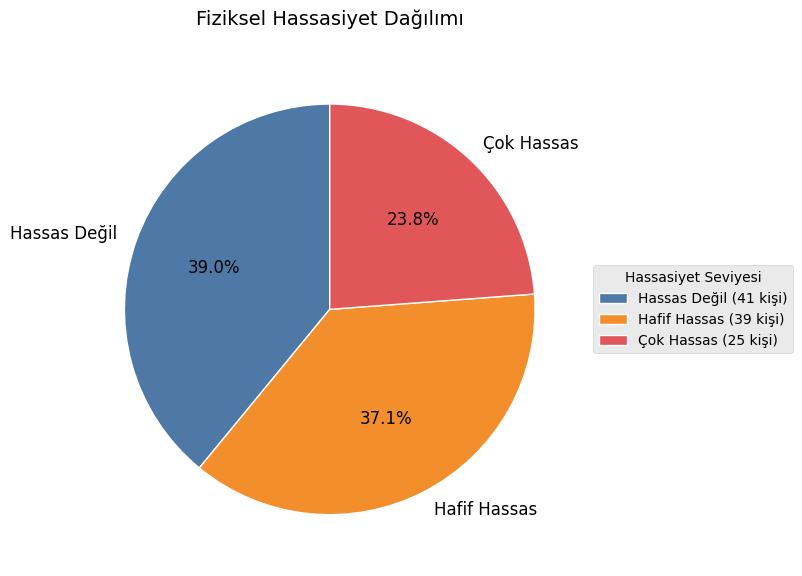

In [24]:
# Fiziksel hassasiyet verisini hazırla
hassasiyet = df['Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?'].value_counts()

# Renk paleti ve etiketler
renkler = ['#4e79a7', '#f28e2b', '#e15759']
etiketler = ['Hassas Değil', 'Hafif Hassas', 'Çok Hassas']

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(hassasiyet,
        labels=etiketler,
        colors=renkler,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12})

# Başlık ekle
plt.title('Fiziksel Hassasiyet Dağılımı', fontsize=14, pad=20)

# Oranları göster
plt.legend(title="Hassasiyet Seviyesi",
           loc="center left",
           bbox_to_anchor=(1, 0.5),
           labels=[f"{etiket} ({sayı} kişi)" for etiket, sayı in zip(etiketler, hassasiyet)])

plt.tight_layout()
plt.show()

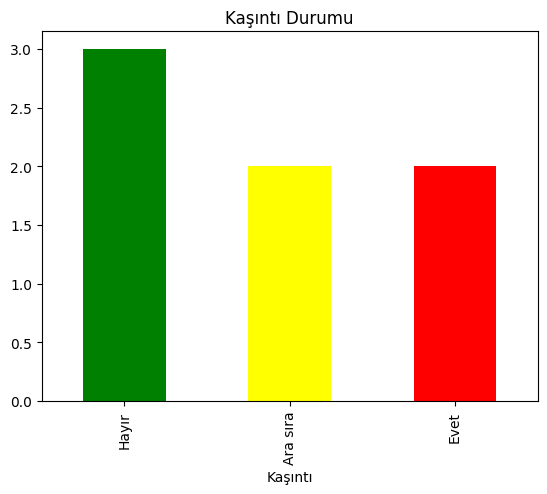

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Manuel veri oluştur (test için)
data = {'Kaşıntı': ['Evet', 'Hayır', 'Ara sıra', 'Hayır', 'Evet', 'Ara sıra', 'Hayır']}
df = pd.DataFrame(data)

# Grafik oluştur
counts = df['Kaşıntı'].value_counts().reindex(['Hayır', 'Ara sıra', 'Evet'])
counts.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Kaşıntı Durumu')
plt.show()

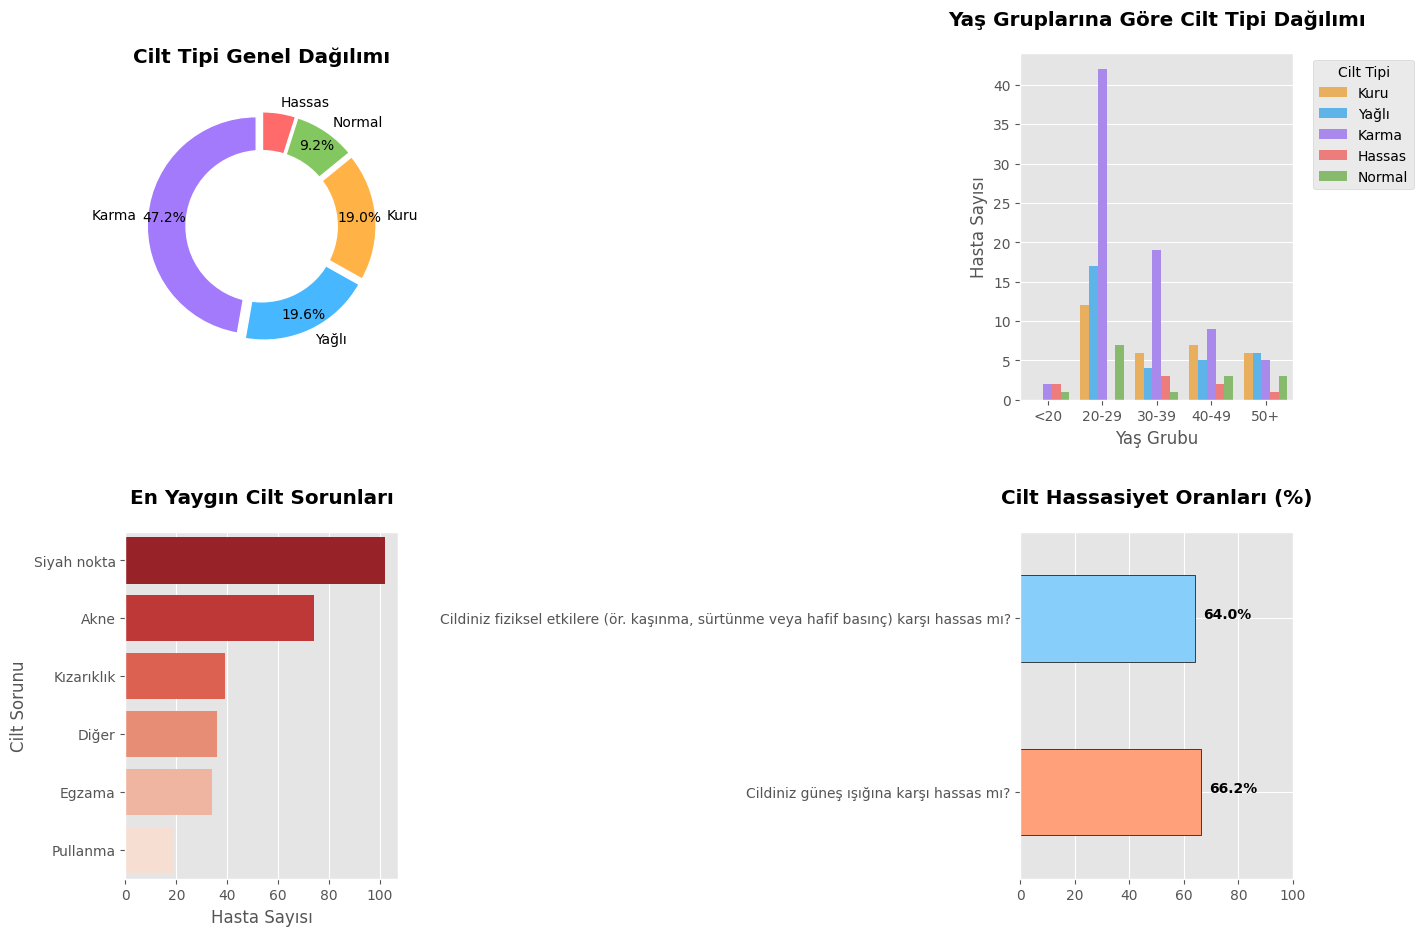

In [36]:
# Önce veriyi hazırlayalım
df['Yaş Grubu'] = pd.cut(df['Kaç yaşındasınız?'], 
                        bins=[0, 20, 30, 40, 50, 100],
                        labels=['<20', '20-29', '30-39', '40-49', '50+'])

# Cilt özellikleri için renk paleti
skin_palette = {
    'Kuru': '#FFB347',
    'Yağlı': '#47B8FF', 
    'Karma': '#A37AFC',
    'Hassas': '#FF6B6B',
    'Normal': '#83C760'
}

# 1. Cilt Tipi Dağılımı
plt.figure(figsize=(15, 10))

# 1.1 Pasta Grafiği (Ana Dağılım) - Eksik verileri temizle
plt.subplot(2, 2, 1)
skin_type_counts = df['Cilt tipiniz nedir?'].value_counts(dropna=True)
explode = [0.05] * len(skin_type_counts)  # Dilimleri ayırmak için

plt.pie(
    skin_type_counts,
    labels=skin_type_counts.index,
    colors=[skin_palette.get(x, '#999999') for x in skin_type_counts.index],  # Bilinmeyenler için gri renk
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',  # Küçük yüzdeleri gösterme
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10},
    explode=explode,
    pctdistance=0.85
)
plt.title('Cilt Tipi Genel Dağılımı', fontweight='bold', pad=20)

# Ortaya boşluk ekleme (doughnut chart)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 1.2 Yaş Gruplarına Göre Cilt Tipleri - Sıralama düzeltildi
plt.subplot(2, 2, 2)
age_order = ['<20', '20-29', '30-39', '40-49', '50+']
skin_order = ['Kuru', 'Yağlı', 'Karma', 'Hassas', 'Normal']

sns.countplot(
    data=df,
    x='Yaş Grubu',
    hue='Cilt tipiniz nedir?',
    palette=skin_palette,
    order=age_order,
    hue_order=skin_order
)
plt.title('Yaş Gruplarına Göre Cilt Tipi Dağılımı', fontweight='bold', pad=20)
plt.xlabel('Yaş Grubu')
plt.ylabel('Hasta Sayısı')
plt.legend(title='Cilt Tipi', bbox_to_anchor=(1.05, 1), loc='upper left')

# 1.3 Cilt Sorunları Analizi - Eksik veriler temizlendi
plt.subplot(2, 2, 3)
if 'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?' in df.columns:
    skin_problems = df['Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?'].str.split(',').explode().str.strip().value_counts()
    skin_problems = skin_problems[skin_problems > 0]  # Sıfır değerleri filtrele
    
    sns.barplot(
        x=skin_problems.values,
        y=skin_problems.index,
        palette='Reds_r',
        order=skin_problems.index  # Sıralamayı koru
    )
    plt.title('En Yaygın Cilt Sorunları', fontweight='bold', pad=20)
    plt.xlabel('Hasta Sayısı')
    plt.ylabel('Cilt Sorunu')

# 1.4 Hassasiyet Analizi - Eksik veriler için düzenleme
plt.subplot(2, 2, 4)
sensitivity_cols = [
    'Cildiniz güneş ışığına karşı hassas mı?',
    'Cildiniz fiziksel etkilere (ör. kaşınma, sürtünme veya hafif basınç) karşı hassas mı?'
]

if all(col in df.columns for col in sensitivity_cols):
    sensitivity_data = df[sensitivity_cols].apply(lambda x: x.map({'Evet': 1, 'Hayır': 0, 'Emin değilim': 0.5}))
    sensitivity_counts = sensitivity_data.mean() * 100
    
    sensitivity_counts.plot(
        kind='barh', 
        color=['#FFA07A', '#87CEFA'],
        edgecolor='black'
    )
    plt.title('Cilt Hassasiyet Oranları (%)', fontweight='bold', pad=20)
    plt.xlim(0, 100)
    for i, v in enumerate(sensitivity_counts):
        plt.text(v + 3, i, f"{v:.1f}%", color='black', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

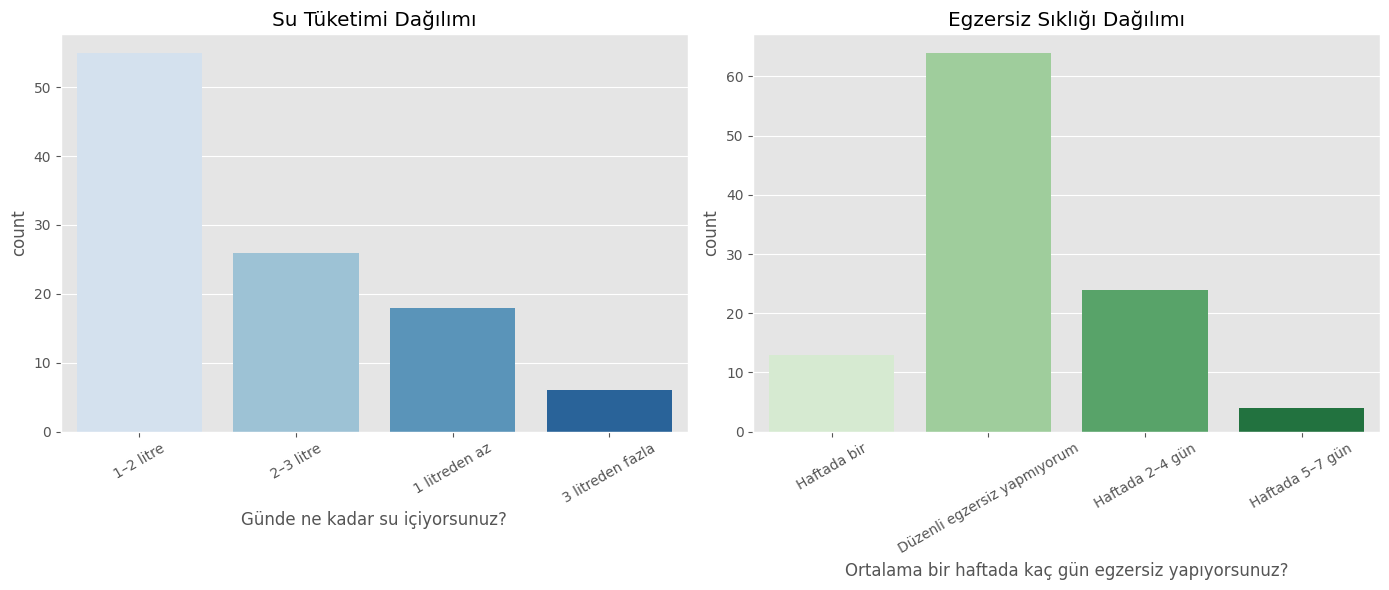

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='Günde ne kadar su içiyorsunuz?', ax=axs[0], palette='Blues')
axs[0].set_title('Su Tüketimi Dağılımı')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30)

sns.countplot(data=df, x='Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?', ax=axs[1], palette='Greens')
axs[1].set_title('Egzersiz Sıklığı Dağılımı')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


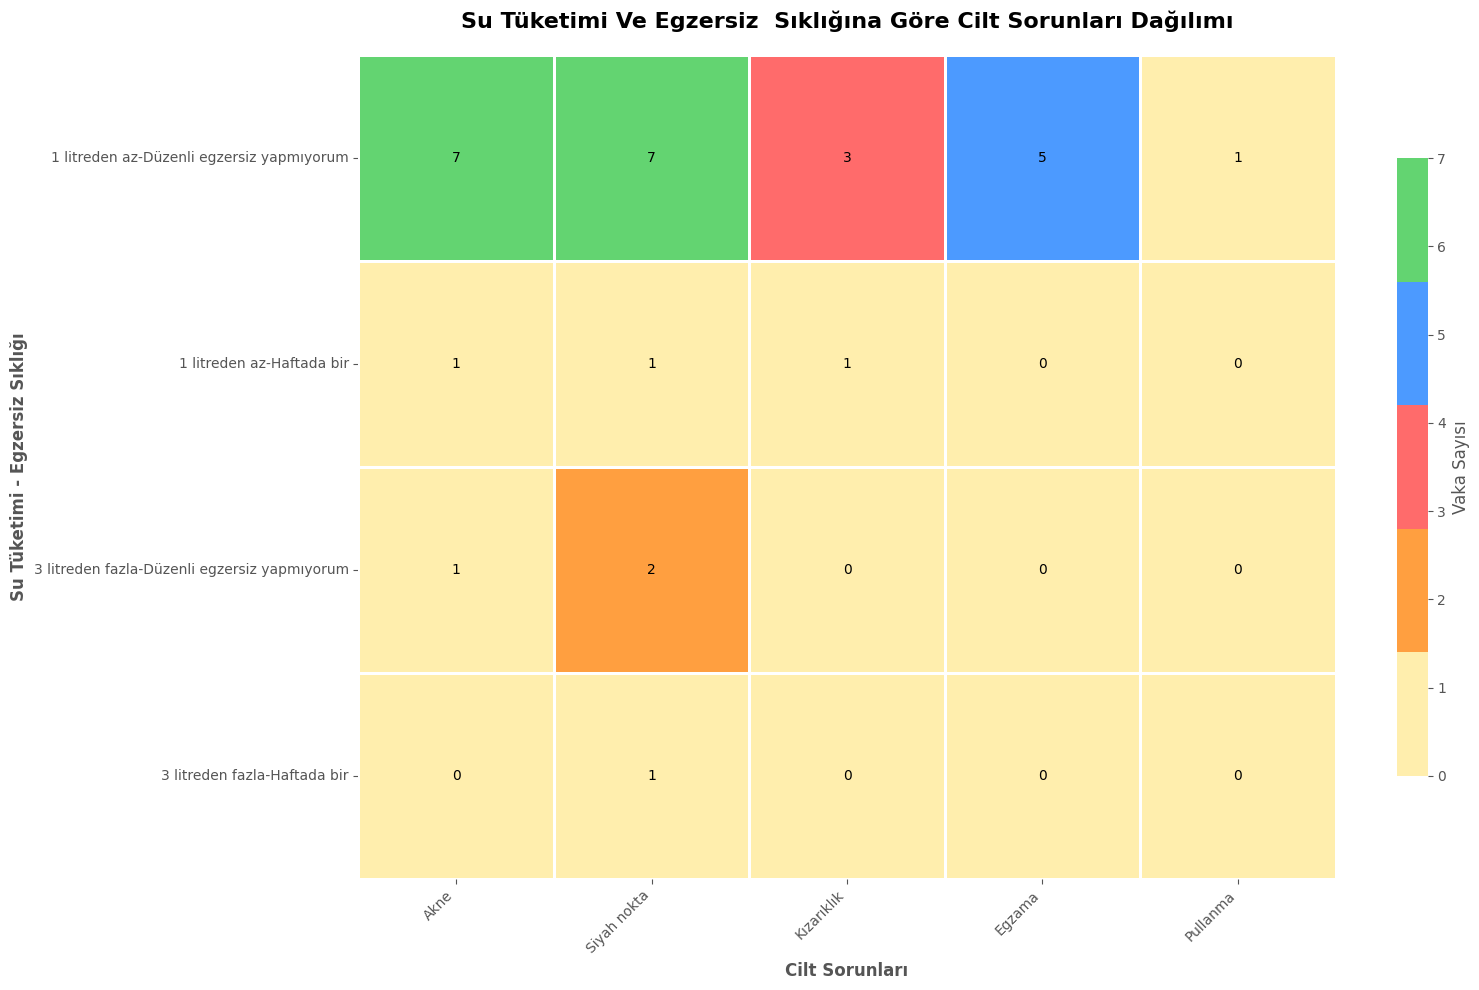

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cilt sorunlarını ayırma ve temizleme
df['Cilt Sorunları'] = df['Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?'].str.split(', ')
df = df.explode('Cilt Sorunları')
df['Cilt Sorunları'] = df['Cilt Sorunları'].fillna('Belirtilmemiş')

# Özel renk paleti
custom_palette = sns.color_palette(["#FFEEAD", "#FF9F40", "#FF6B6B", "#4C9AFF", "#63D471"])

# Heatmap verisini hazırlama
heatmap_data = df.groupby(['Günde ne kadar su içiyorsunuz?', 
                         'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?',
                         'Cilt Sorunları']).size().unstack().fillna(0)

# Sadece belirli cilt sorunlarını göster (isteğe bağlı)
selected_issues = ['Akne', 'Siyah nokta', 'Kızarıklık', 'Egzama', 'Pullanma']
heatmap_data = heatmap_data[selected_issues]

# Sıralamaları düzenle
su_order = ['1 litreden az', '1-2 litre', '2-3 litre', '3 litreden fazla']
exercise_order = ['Düzenli egzersiz yapmıyorum', 'Haftada bir', 'Haftada 2-4 gün', 'Haftada 5-7 gün']
heatmap_data = heatmap_data.reindex(index=su_order, level=0).reindex(exercise_order, level=1)

# Grafik oluşturma
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, 
            cmap=custom_palette, 
            annot=True, 
            fmt='g',
            linewidths=0.8,
            linecolor='white',
            cbar_kws={'label': 'Vaka Sayısı', 'shrink': 0.75},
            annot_kws={'size': 10, 'color': 'black'})

plt.title('Su Tüketimi Ve Egzersiz  Sıklığına Göre Cilt Sorunları Dağılımı', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Cilt Sorunları', fontsize=12, fontweight='bold')
plt.ylabel('Su Tüketimi - Egzersiz Sıklığı', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Çizgileri ve arka planı iyileştirme
plt.gca().set_facecolor('#F5F5F5')
plt.grid(False)

plt.tight_layout()
plt.show()

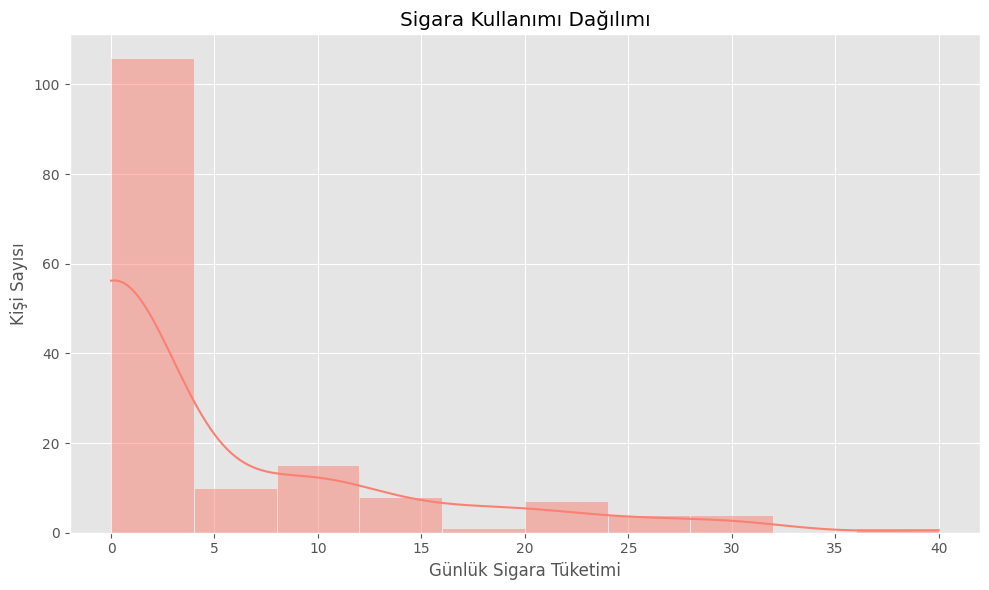

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Günde ortalama kaç sigara içiyorsunuz?'], bins=10, kde=True, color='salmon')
plt.title("Sigara Kullanımı Dağılımı")
plt.xlabel("Günlük Sigara Tüketimi")
plt.ylabel("Kişi Sayısı")
plt.tight_layout()
plt.show()



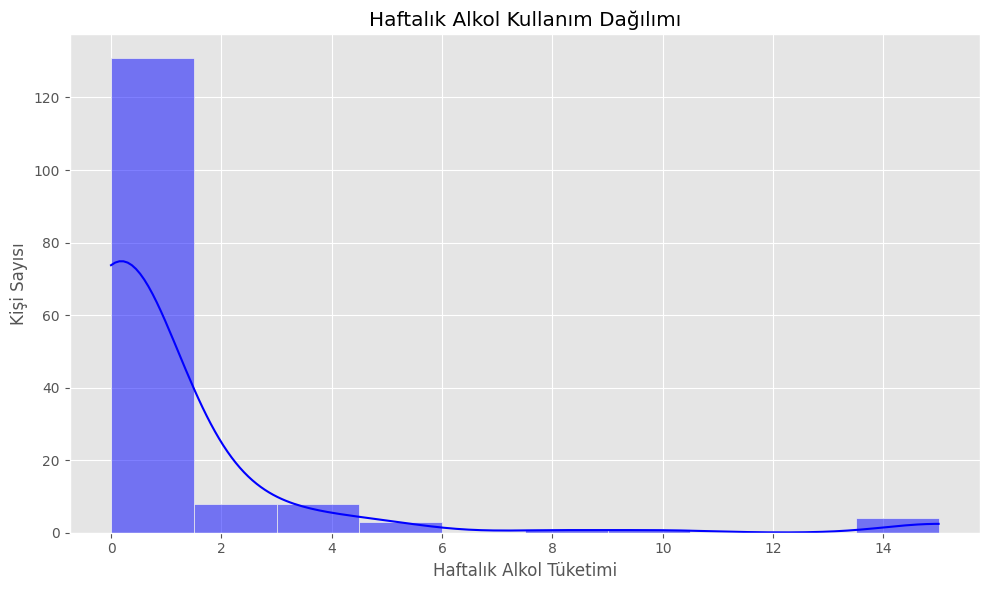

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?'], bins=10, kde=True, color='blue')
plt.title("Haftalık Alkol Kullanım Dağılımı")
plt.xlabel("Haftalık Alkol Tüketimi")
plt.ylabel("Kişi Sayısı")
plt.tight_layout()
plt.show()

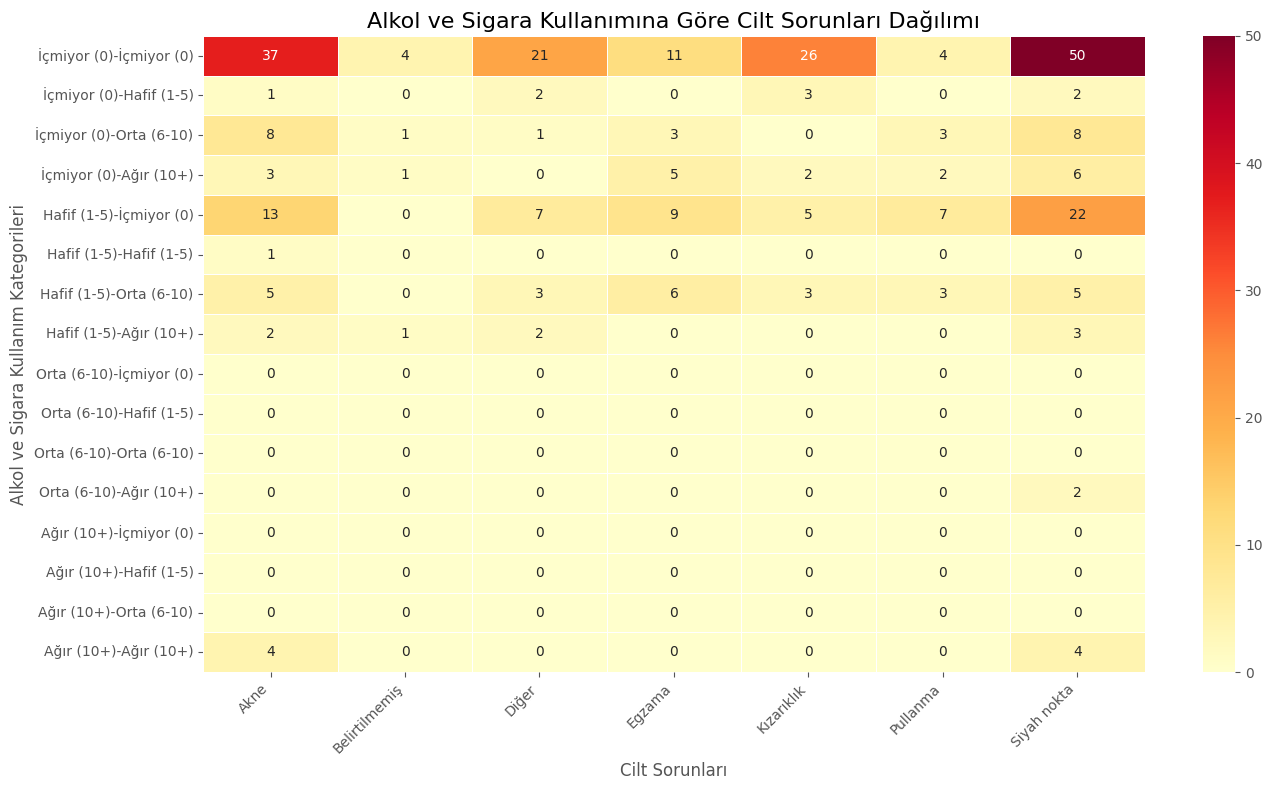

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Temizlik ve dönüşümler
df['Alkol Tüketimi'] = pd.to_numeric(df['Haftada yaklaşık kaç alkollü içecek tüketiyorsunuz?'], errors='coerce').fillna(0)
df['Sigara Kullanımı'] = pd.to_numeric(df['Günde ortalama kaç sigara içiyorsunuz?'], errors='coerce').fillna(0)

# Alkol ve sigara kullanım kategorileri
df['Alkol Kategorisi'] = pd.cut(df['Alkol Tüketimi'], 
                               bins=[-1, 0, 5, 10, float('inf')], 
                               labels=['İçmiyor (0)', 'Hafif (1-5)', 'Orta (6-10)', 'Ağır (10+)'])
df['Sigara Kategorisi'] = pd.cut(df['Sigara Kullanımı'], 
                                bins=[-1, 0, 5, 10, float('inf')], 
                                labels=['İçmiyor (0)', 'Hafif (1-5)', 'Orta (6-10)', 'Ağır (10+)'])

# Cilt sorunlarını ayırma (virgülle ayrılmış değerleri split ediyoruz)
df['Cilt Sorunları'] = df['Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?'].str.split(', ')

# Cilt sorunlarını genişletme (her sorun için ayrı satır)
exploded_df = df.explode('Cilt Sorunları')

# NaN değerleri "Belirtilmemiş" olarak işaretleme
exploded_df['Cilt Sorunları'] = exploded_df['Cilt Sorunları'].fillna('Belirtilmemiş')

# Grafik boyutu
plt.figure(figsize=(14, 8))

# Heatmap için pivot tablo
heatmap_data = exploded_df.groupby(['Alkol Kategorisi', 'Sigara Kategorisi', 'Cilt Sorunları']).size().unstack().fillna(0)

# Heatmap çizimi
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g', linewidths=0.5)
plt.title('Alkol ve Sigara Kullanımına Göre Cilt Sorunları Dağılımı', fontsize=16)
plt.xlabel('Cilt Sorunları', fontsize=12)
plt.ylabel('Alkol ve Sigara Kullanım Kategorileri', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

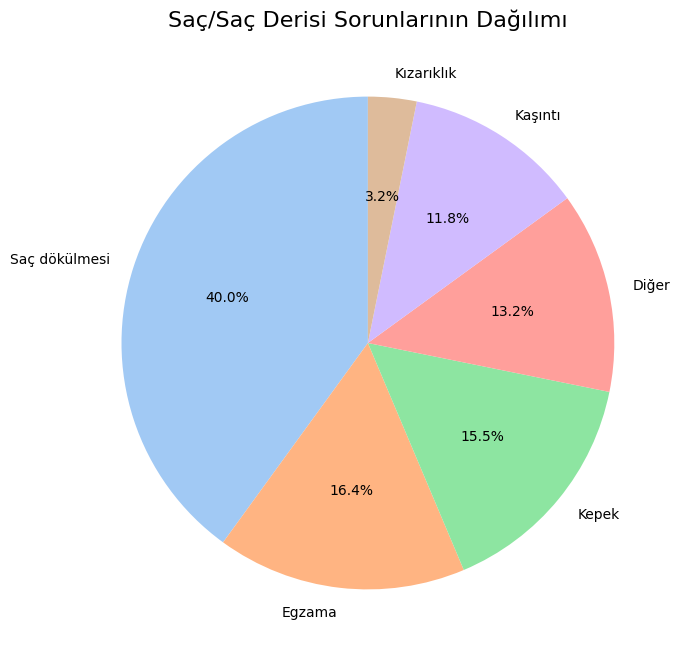

In [32]:
# Saç sorunlarını ayırma
df['Saç Sorunları'] = df['Hangi saç veya saç derisi sorunlarını yaşıyorsunuz?'].str.split(', ')
saç_sorunlari = df.explode('Saç Sorunları')['Saç Sorunları'].value_counts()

# Pasta grafiği
plt.figure(figsize=(10, 8))
plt.pie(saç_sorunlari, labels=saç_sorunlari.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Saç/Saç Derisi Sorunlarının Dağılımı', fontsize=16)
plt.show()

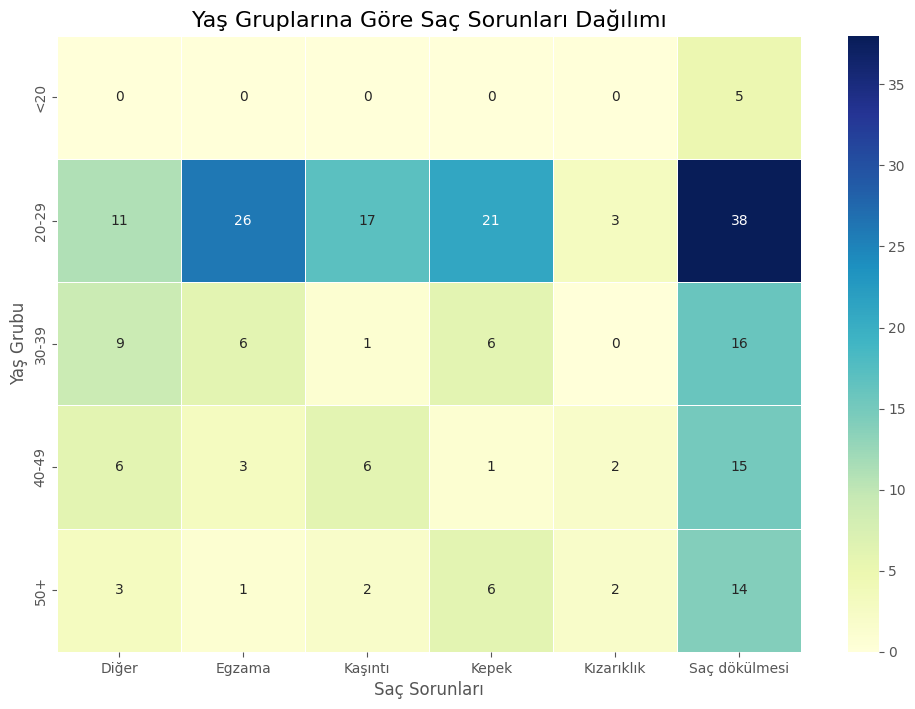

In [33]:
# Yaş grupları oluşturma
df['Yaş Grubu'] = pd.cut(df['Kaç yaşındasınız?'], 
                        bins=[0, 20, 30, 40, 50, 100],
                        labels=['<20', '20-29', '30-39', '40-49', '50+'])

# Heatmap verisi
heatmap_data = df.explode('Saç Sorunları').groupby(['Yaş Grubu', 'Saç Sorunları']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Yaş Gruplarına Göre Saç Sorunları Dağılımı', fontsize=16)
plt.xlabel('Saç Sorunları', fontsize=12)
plt.ylabel('Yaş Grubu', fontsize=12)
plt.show()

<Figure size 1400x1000 with 0 Axes>

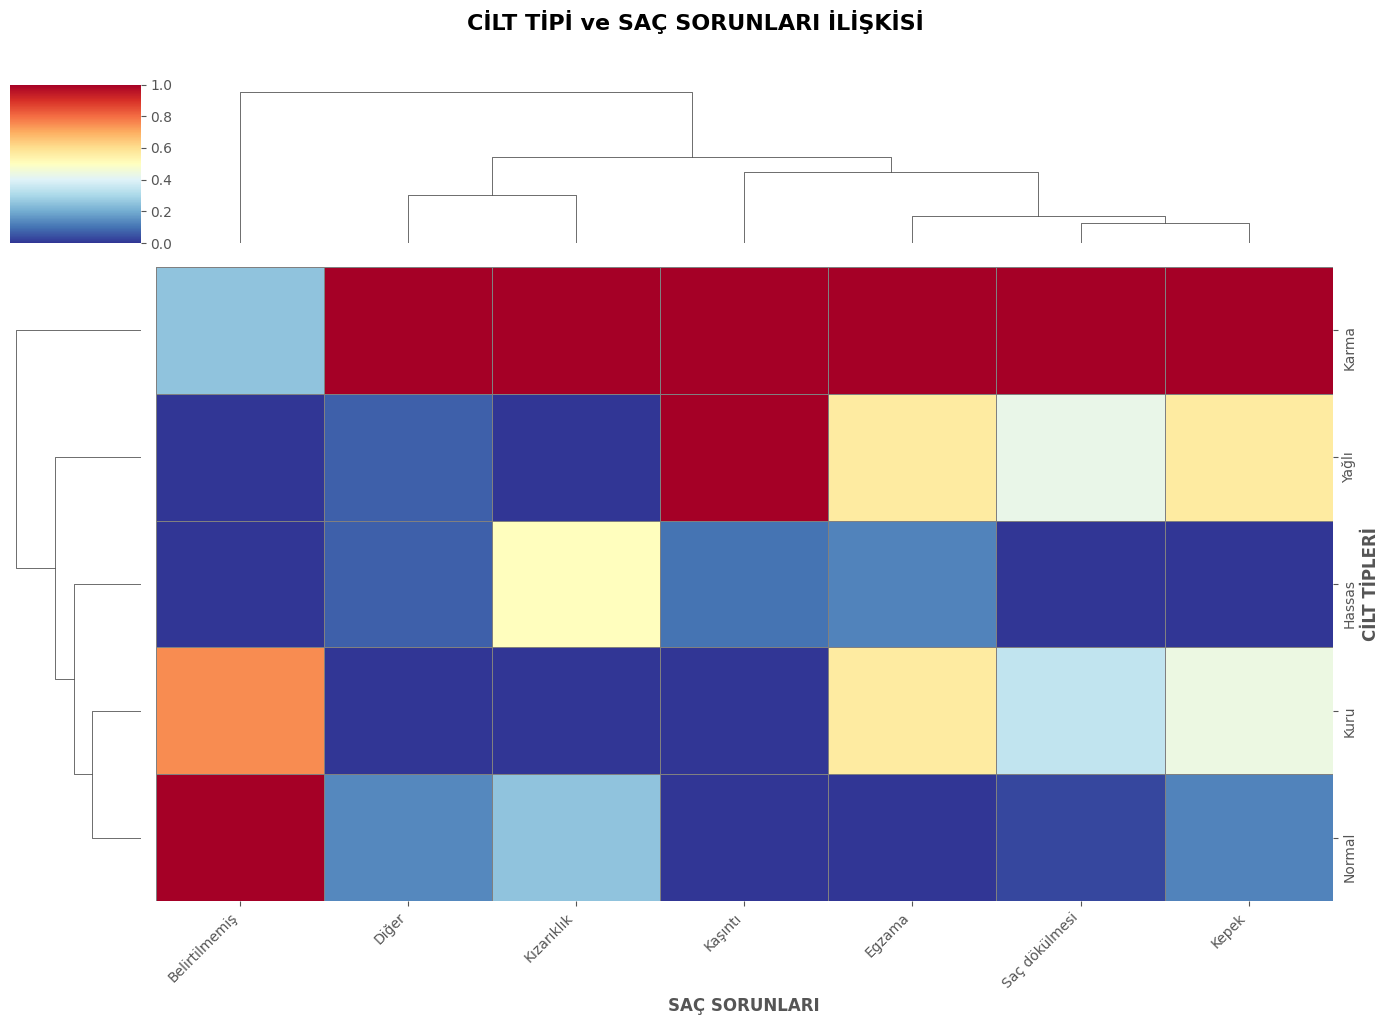

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi hazırlama
df_sac = df.explode('Saç Sorunları').copy()

# NaN değerleri temizleme
df_sac['Saç Sorunları'] = df_sac['Saç Sorunları'].fillna('Belirtilmemiş')

# Yinelenen indeksleri kaldırma
df_sac = df_sac.reset_index(drop=True)

# Çapraz tablo oluşturma (hata önleme ile)
try:
    cross_tab = pd.crosstab(
        df_sac['Cilt tipiniz nedir?'],
        df_sac['Saç Sorunları']
    )
    
    # En yaygın 8 sorunu seçme (isteğe bağlı)
    top_sorunlar = df_sac['Saç Sorunları'].value_counts().head(8).index
    cross_tab = cross_tab[top_sorunlar]
    
    # Cluster map oluşturma
    plt.figure(figsize=(14, 10))
    cluster = sns.clustermap(
        cross_tab,
        cmap='RdYlBu_r',
        standard_scale=1,
        method='average',
        figsize=(14, 10),
        dendrogram_ratio=(.1, .2),
        cbar_pos=(0.02, 0.8, 0.05, 0.18),
        linewidths=0.5,
        linecolor='gray'
    )
    
    # Grafik düzenlemeleri
    plt.suptitle('CİLT TİPİ ve SAÇ SORUNLARI İLİŞKİSİ', 
                 y=1.02, fontsize=16, fontweight='bold')
    cluster.ax_heatmap.set_xlabel('SAÇ SORUNLARI', fontsize=12, fontweight='bold')
    cluster.ax_heatmap.set_ylabel('CİLT TİPLERİ', fontsize=12, fontweight='bold')
    cluster.ax_heatmap.set_xticklabels(
        cluster.ax_heatmap.get_xticklabels(), 
        rotation=45, 
        ha='right',
        fontsize=10
    )
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Hata oluştu: {e}")
    print("Veriyi kontrol edin - eksik veya yinelenen değerler olabilir.")

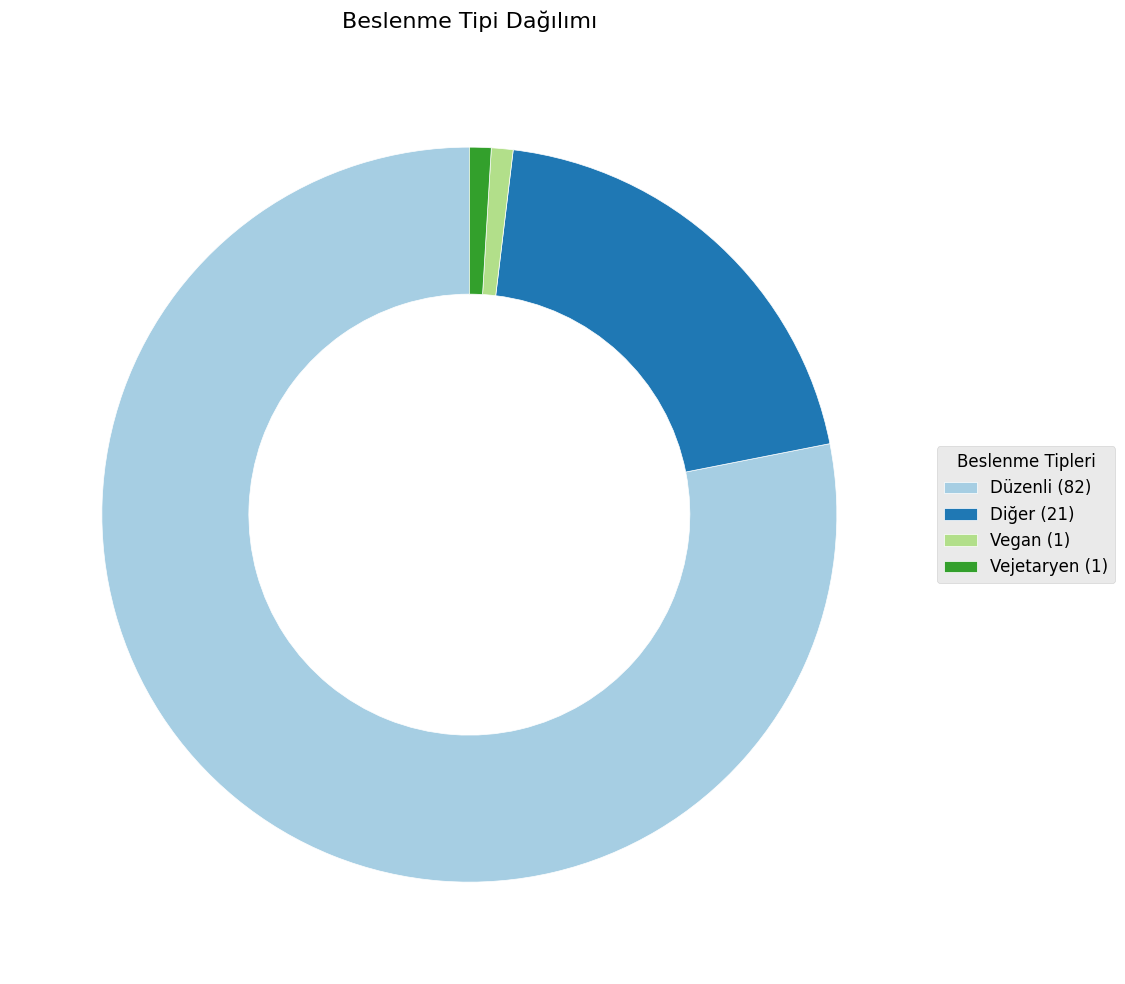

In [43]:
# Beslenme tipi sütununu temizle ve grupla
nutrition_data = df['Beslenme tipiniz nedir?'].fillna('Belirtilmemiş')
nutrition_counts = nutrition_data.value_counts()

# 'Diğer' ve boş değerleri birleştir
if 'Diğer' in nutrition_counts:
    nutrition_counts['Diğer'] += nutrition_counts.get('Belirtilmemiş', 0)
    if 'Belirtilmemiş' in nutrition_counts:
        nutrition_counts = nutrition_counts.drop('Belirtilmemiş')

# Grafik ayarları
plt.figure(figsize=(12, 10))
plt.rcParams['font.size'] = 12

# Pasta grafiğini oluştur
wedges, texts = plt.pie(
    nutrition_counts,
    labels=None,  # Etiketleri başta kaldırdık
    colors=plt.cm.Paired.colors,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w'),  # Daha ince görünüm
    textprops={'color': 'black', 'fontsize': 10}
)

# Başlık
plt.title('Beslenme Tipi Dağılımı', fontsize=16, pad=20)

# Özel lejant oluştur (etiketleri yan yana)
plt.legend(
    wedges,
    [f"{label} ({value})" for label, value in zip(nutrition_counts.index, nutrition_counts)],
    title="Beslenme Tipleri",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

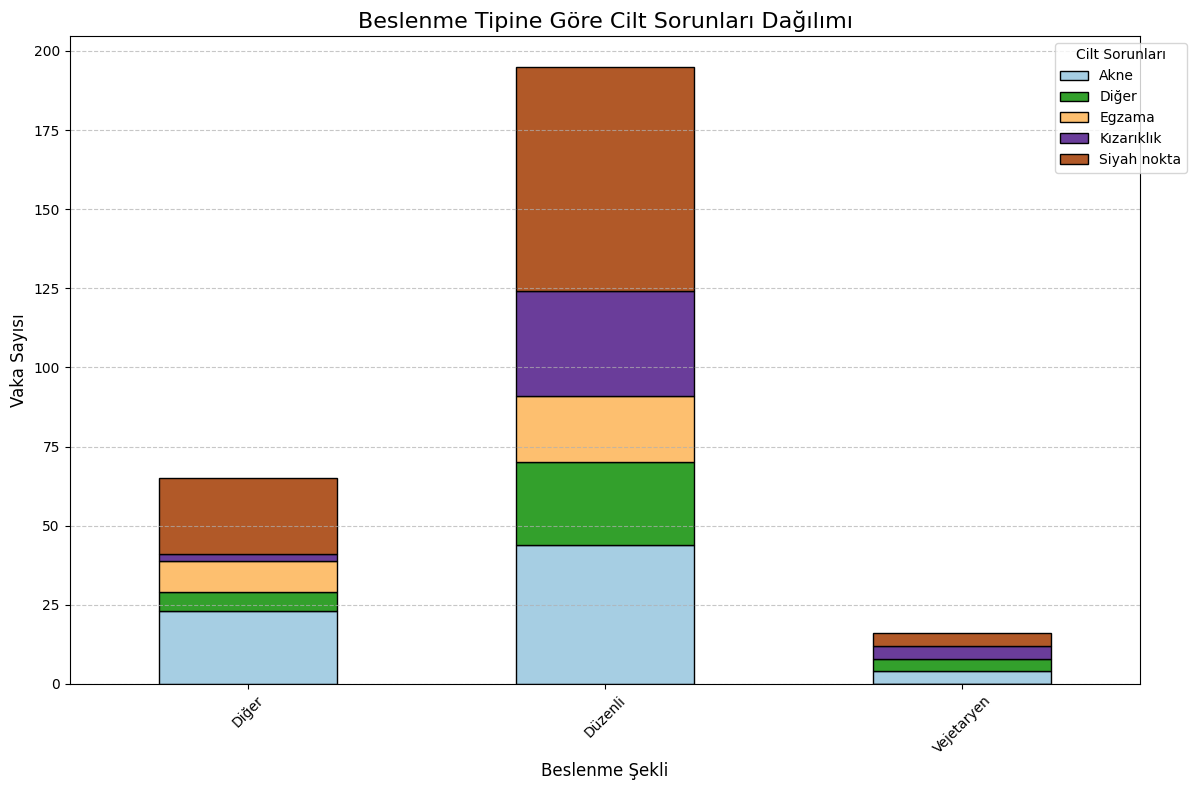

In [ ]:
plt.figure(figsize=(12, 8))

# En yaygın 5 cilt sorunu
top_sorunlar = df.explode('Cilt Sorunları')['Cilt Sorunları'].value_counts().nlargest(5).index

# Veri filtreleme
stack_data = df.explode('Cilt Sorunları')[df.explode('Cilt Sorunları')['Cilt Sorunları'].isin(top_sorunlar)]
stack_data = stack_data.groupby(
    ['Beslenme tipiniz nedir?', 'Cilt Sorunları']).size().unstack()

# Grafik
stack_data.plot(kind='bar', 
                stacked=True,
                colormap='Paired',
                edgecolor='black',
                figsize=(12, 8))

plt.title('Beslenme Tipine Göre Cilt Sorunları Dağılımı', fontsize=16)
plt.xlabel('Beslenme Şekli', fontsize=12)
plt.ylabel('Vaka Sayısı', fontsize=12)
plt.legend(title='Cilt Sorunları', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

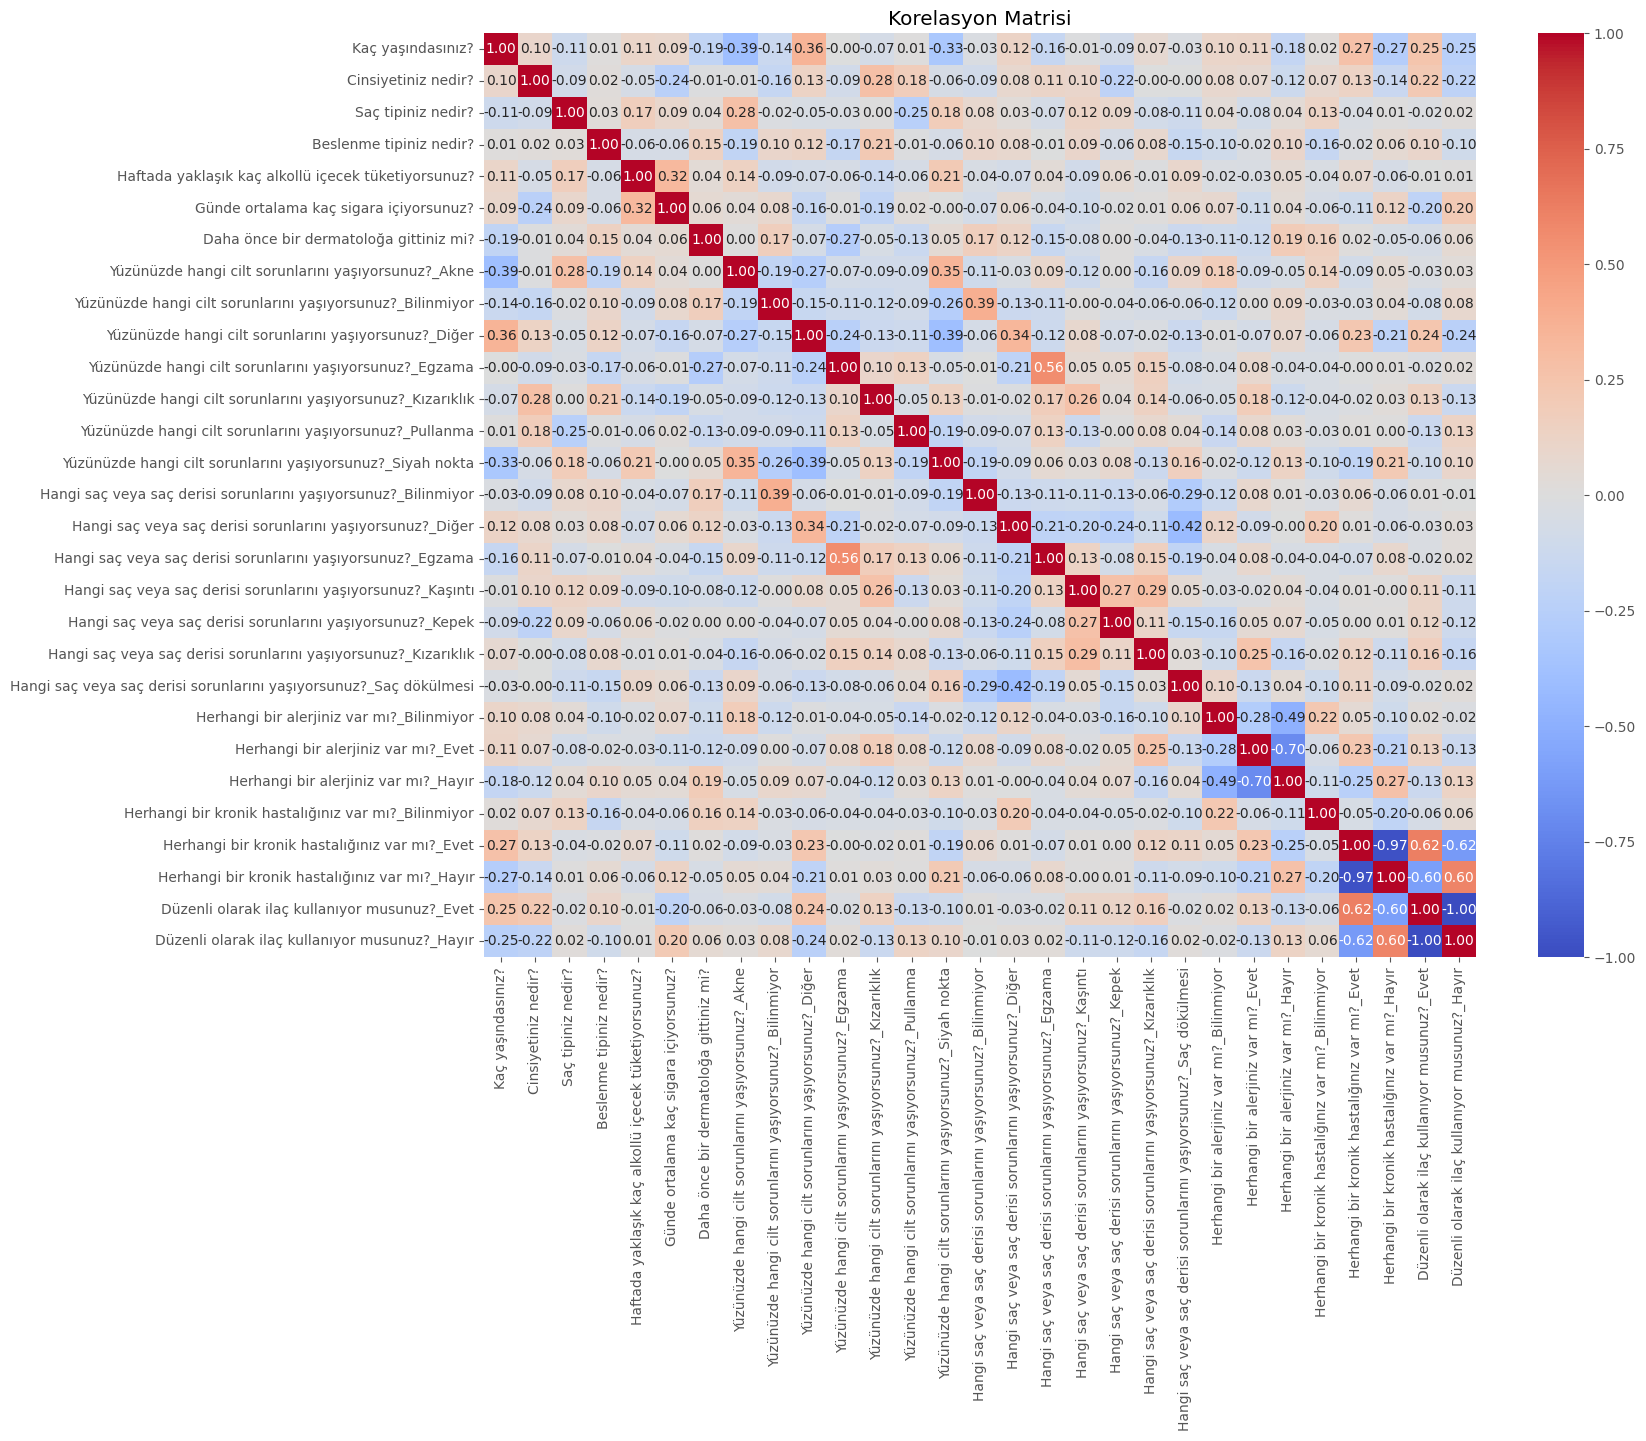

In [ ]:
#Korelasyon Analizi
plt.figure(figsize=(16, 12))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.show()

**Yaş ile İlgili Korelasyonlar**
*Yaş & Kuru Cilt*:
Pozitif korelasyon çıkabilir (yaş arttıkça kuru cilt şikayetleri artabilir).
Sebep: Yaşlanmayla ciltte nem kaybı ve sebum üretiminin azalması.

*Yaş & Saç Dökülmesi*:
Güçlü pozitif korelasyon beklenir.
Sebep: Androgenetik alopesi (erkek/kadın tipi saç dökülmesi) yaşla artar.

*Yaş & Kronik Hastalık*:
Pozitif korelasyon olabilir.
Sebep: Diyabet, hipertansiyon gibi hastalıkların yaşla birlikte artması.

**Cilt Tipi ile İlgili Korelasyonlar**
*Yağlı Cilt & Akne/Siyah Nokta*:
Güçlü pozitif korelasyon beklenir.
Sebep: Aşırı sebum üretimi, gözenek tıkanıklığına yol açar.

*Kuru Cilt & Pullanma/Egzama*:
Pozitif korelasyon görülebilir.
Sebep: Cilt bariyerinin bozulması ve nem kaybı.

*Hassas Cilt & Kızarıklık*:
Yüksek korelasyon çıkabilir.
Sebep: Hassas ciltlerde inflamasyon ve irritasyon daha sık görülür.

**Yaşam Tarzı ile İlgili Korelasyonlar**
*Su Tüketimi & Cilt Nemliliği*:
Negatif korelasyon (az su içenlerde kuru cilt şikayetleri artabilir).

*Egzersiz Yapmama & Yağlı Cilt/Akne*:
Zayıf negatif korelasyon olabilir.
Sebep: Egzersiz yapmayanlarda terleme azlığı ve toksin birikimi.

*Sigara/Alkol & Cilt Yaşlanmas*ı:
Sigara içenlerde kırışıklık veya kızarıklık ile pozitif korelasyon çıkabilir.
Sebep: Sigara, ciltte oksidatif stresi artırır.

**Cinsiyet ile İlgili Korelasyonlar**
*Kadınlarda*:
Kuru cilt ve saç dökülmesi daha yüksek korelasyon gösterebilir (hormonal faktörler).
Egzema ve hassasiyet daha sık görülebilir.

*Erkeklerde*:
Yağlı cilt ve akne korelasyonu daha belirgin olabilir.
Erkeklerde saç dökülmesi yaşla daha güçlü ilişkili çıkabilir.

**Diğer Önemli İlişkiler**
*Alerji & Egzema*:
Pozitif korelasyon beklenir.
Sebep: Atopik dermatit gibi alerjik kökenli cilt sorunları.

*Dermatoloğa Gitme & Kronik Hastalık*:
Kronik hastalığı olanların dermatoloğa daha sık başvurması nedeniyle pozitif korelasyon çıkabilir.

*Düzenli İlaç Kullanımı & Cilt Kuruluğu*:
Bazı ilaçlar (ör. akne tedavisinde isotretinoin) cilt kuruluğuna neden olabilir.

**Sonuç Özeti**
*En güçlü korelasyonlar*:
Yağlı cilt ↔ Akne
Yaş ↔ Saç dökülmesi
Hassas cilt ↔ Kızarıklık
Yaşam tarzı faktörleri (su, egzersiz, sigara) cilt sağlığıyla ilişkili ancak daha zayıf korelasyonlar gösteriyor.
Cinsiyet, cilt sorunlarının tipini ve sıklığını önemli ölçüde etkiliyor.



Açıklanan Varyans Oranları: [0.26833625 0.24024318 0.17248454]

PCA Bileşenleri Açıklaması:
      count          mean       std       min       25%       50%       75%  \
PCA1  311.0 -1.142352e-17  1.270910 -3.264833 -0.936081  0.305345  1.073759   
PCA2  311.0  2.284703e-17  1.202543 -2.055367 -0.871494 -0.225895  0.969257   
PCA3  311.0 -2.284703e-17  1.018943 -1.908211 -0.586301 -0.150935  0.635683   

           max  
PCA1  1.822531  
PCA2  2.605529  
PCA3  2.351834  


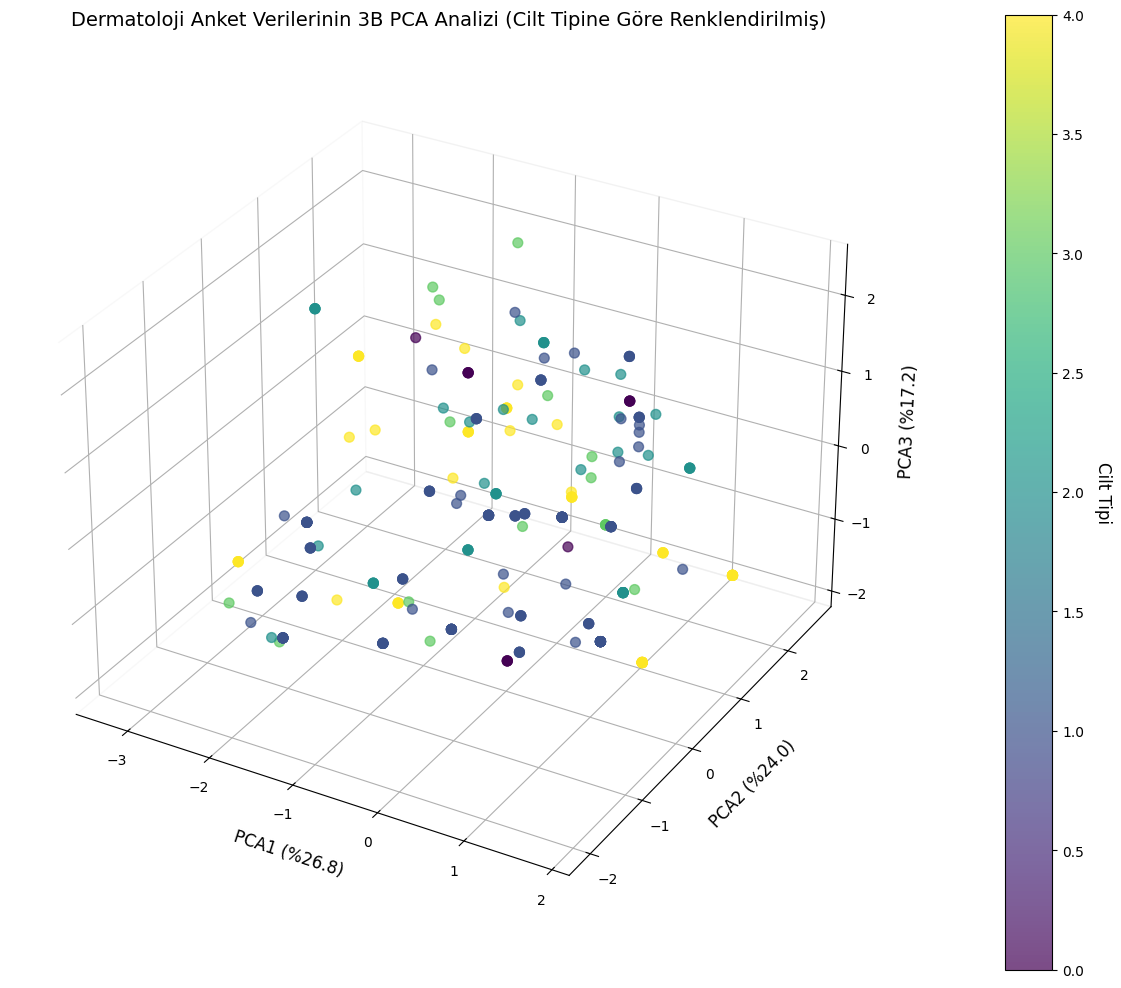

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA için gerekli sütunları seçme ve ön işleme
df_pca = pd.get_dummies(df[[
    'Kaç yaşındasınız?',
    'Cilt tipiniz nedir?',
    'Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?',
    'Günde ne kadar su içiyorsunuz?',
    'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?',
    'Cinsiyetiniz nedir?'
]].apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x))

# Veriyi standardize etme
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# PCA uygulama
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# PCA sonuçlarını DataFrame'e dönüştürme
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Açıklanan varyans oranları
print("Açıklanan Varyans Oranları:", pca.explained_variance_ratio_)
print("\nPCA Bileşenleri Açıklaması:")
print(pca_df.describe().T)

# 3D Görselleştirme
x = pca_df['PCA1']
y = pca_df['PCA2']
z = pca_df['PCA3']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Cilt tipine göre renklendirme
cilt_tipleri = df['Cilt tipiniz nedir?'].astype('category').cat.codes
scatter = ax.scatter(x, y, z, c=cilt_tipleri, cmap='viridis', marker='o', alpha=0.7, s=50)

# Başlık ve etiketler
ax.set_title("Dermatoloji Anket Verilerinin 3B PCA Analizi (Cilt Tipine Göre Renklendirilmiş)", 
             fontsize=14, pad=20)
ax.set_xlabel(f"PCA1 (%{pca.explained_variance_ratio_[0]*100:.1f})", fontsize=12, labelpad=10)
ax.set_ylabel(f"PCA2 (%{pca.explained_variance_ratio_[1]*100:.1f})", fontsize=12, labelpad=10)
ax.set_zlabel(f"PCA3 (%{pca.explained_variance_ratio_[2]*100:.1f})", fontsize=12, labelpad=10)

# Renk çubuğu (colorbar)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cilt Tipi', rotation=270, labelpad=20, fontsize=12)

# Eksen arka planını iyileştirme
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

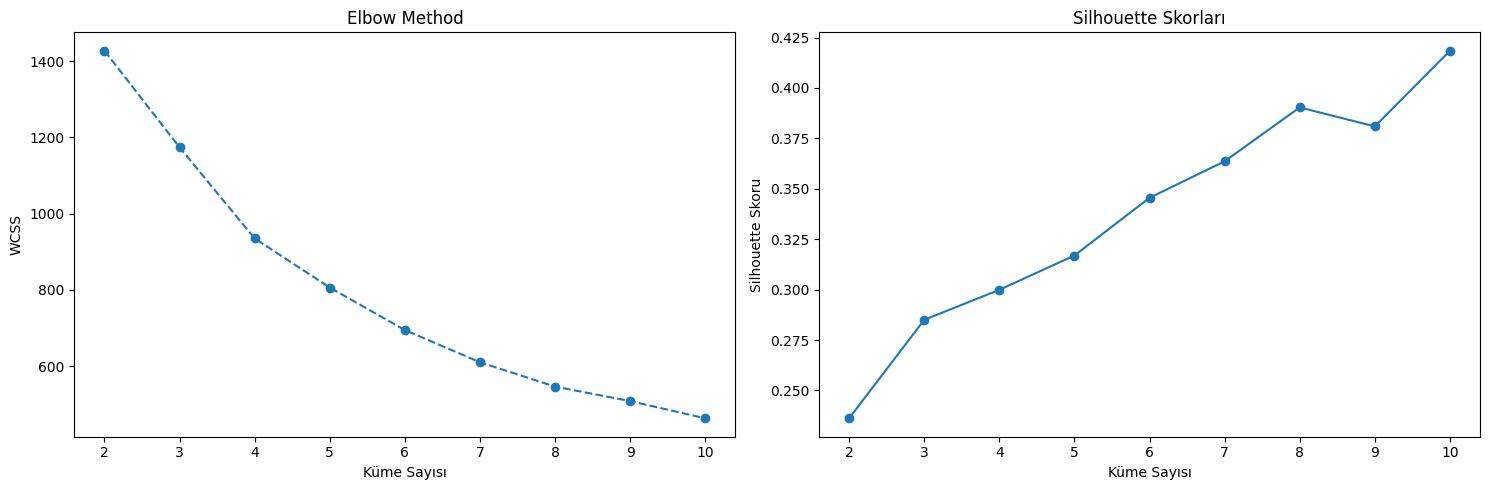

Önerilen küme sayısı: 10


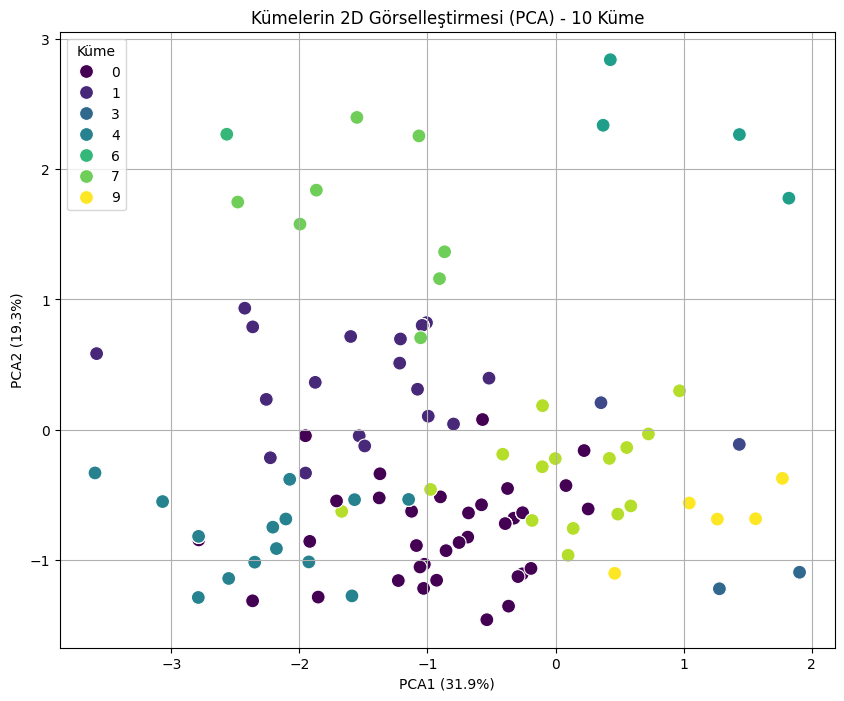


Küme Özetleri:

Küme 0 (59 hasta):
• Ortalama Yaş: 45.9
• Cilt Tipleri: {'Karma': 30, 'Kuru': 15, 'Hassas': 10, 'Normal': 4}
• Cinsiyet Dağılımı: {'Kadın': 58, 'Erkek': 1}
• Ortalama Cilt Sorunu Sayısı: 1.5

Küme 1 (45 hasta):
• Ortalama Yaş: 26.1
• Cilt Tipleri: {'Karma': 23, 'Kuru': 11, 'Yağlı': 9, 'Normal': 2}
• Cinsiyet Dağılımı: {'Erkek': 44, 'Belirtmek istemiyorum': 1}
• Ortalama Cilt Sorunu Sayısı: 1.8

Küme 2 (25 hasta):
• Ortalama Yaş: 31.6
• Cilt Tipleri: {'Karma': 25}
• Cinsiyet Dağılımı: {'Kadın': 25}
• Ortalama Cilt Sorunu Sayısı: 3.6

Küme 3 (25 hasta):
• Ortalama Yaş: 22.4
• Cilt Tipleri: {'Yağlı': 25}
• Cinsiyet Dağılımı: {'Kadın': 25}
• Ortalama Cilt Sorunu Sayısı: 3.6

Küme 4 (26 hasta):
• Ortalama Yaş: 45.2
• Cilt Tipleri: {'Yağlı': 23, 'Normal': 3}
• Cinsiyet Dağılımı: {'Erkek': 26}
• Ortalama Cilt Sorunu Sayısı: 1.6

Küme 5 (36 hasta):
• Ortalama Yaş: 26.0
• Cilt Tipleri: {'Karma': 36}
• Cinsiyet Dağılımı: {'Kadın': 27, 'Erkek': 9}
• Ortalama Cilt Sorunu Sayısı: 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Cilt sorunu sayısını hesapla ve ana dataframe'e ekle
df['Cilt_Sorunu_Sayısı'] = df['Yüzünüzde hangi cilt sorunlarını yaşıyorsunuz?'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# Kümeleme için özellik seçimi
cluster_features = df[[
    'Kaç yaşındasınız?',
    'Cilt tipiniz nedir?',
    'Günde ne kadar su içiyorsunuz?',
    'Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?',
    'Cinsiyetiniz nedir?',
    'Cilt_Sorunu_Sayısı'  # Bu artık df'de mevcut
]].copy()

# Egzersiz sıklığını sayısala çevirme
exercise_mapping = {
    "Düzenli egzersiz yapmıyorum": 0,
    "Haftada bir": 1,
    "Haftada 2-4 gün": 3,
    "Haftada 5-7 gün": 6
}
cluster_features['Egzersiz_Sıklığı'] = cluster_features['Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?'].map(exercise_mapping).fillna(0)
cluster_features.drop('Ortalama bir haftada kaç gün egzersiz yapıyorsunuz?', axis=1, inplace=True)

# Kategorik değişkenleri kodlama
cat_cols = ['Cilt tipiniz nedir?', 'Günde ne kadar su içiyorsunuz?', 'Cinsiyetiniz nedir?']
for col in cat_cols:
    le = LabelEncoder()
    cluster_features[col] = le.fit_transform(cluster_features[col].astype(str))

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Optimal küme sayısını belirleme
wcss = []
silhouette_scores = []
max_clusters = 10
cluster_range = range(2, max_clusters+1)

plt.figure(figsize=(15, 5))

# Elbow Method
plt.subplot(1, 2, 1)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=20)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')

# Silhouette Skorları
plt.subplot(1, 2, 2)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=20)
    preds = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, preds))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Skorları')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')

plt.tight_layout()
plt.show()

# Optimal küme sayısı
optimal_clusters = np.argmax(silhouette_scores) + 2
print(f"Önerilen küme sayısı: {optimal_clusters}")

# Final kümeleme
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=20)
df['Küme'] = kmeans.fit_predict(scaled_features)

# PCA ile 2D görselleştirme
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Küme'], palette='viridis', s=100)
plt.title(f'Kümelerin 2D Görselleştirmesi (PCA) - {optimal_clusters} Küme')
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.legend(title='Küme')
plt.grid(True)
plt.show()

# Küme özetleri
print("\nKüme Özetleri:")
for cluster in sorted(df['Küme'].unique()):
    cluster_data = df[df['Küme'] == cluster]
    print(f"\nKüme {cluster} ({len(cluster_data)} hasta):")
    print(f"• Ortalama Yaş: {cluster_data['Kaç yaşındasınız?'].mean():.1f}")
    print(f"• Cilt Tipleri: {cluster_data['Cilt tipiniz nedir?'].value_counts().to_dict()}")
    print(f"• Cinsiyet Dağılımı: {cluster_data['Cinsiyetiniz nedir?'].value_counts().to_dict()}")
    print(f"• Ortalama Cilt Sorunu Sayısı: {cluster_data['Cilt_Sorunu_Sayısı'].mean():.1f}")

## 📌 Sonuçlar

 **Cilt Tipi Dağılımı:** Katılımcıların çoğu karma veya yağlı cilt tipine sahip. Bu, genç nüfusa veya makyaj/temizlik alışkanlıklarına bağlı olabilir.

**Cilt Sorunları:** En yaygın sorunlar arasında sivilce, siyah nokta ve gözenek problemleri öne çıkmaktadır.

**Su Tüketimi:** Katılımcıların önemli bir kısmı günlük yeterli su tüketmiyor (1-2 litre arası).

**Egzersiz:** Egzersiz sıklığı genellikle düşük seviyede. Bu da cilt kalitesini etkileyen bir faktör olabilir.

 **Segmentasyon Sonuçları:** KMeans kümeleme sonucunda anlamlı 3–4 farklı grup elde edilmiştir. Bu gruplar yaş, cilt tipi, cinsiyet ve yaşam tarzı farklarına göre ayrışıyor.


## 🌟 Öneriler

**Karma ve yağlı cilt tipine** sahip bireyler için gözenek sıkılaştırıcı ve yağ dengeleyici ürünlerin önerilmesi.

**Düşük su tüketimi** olan bireylerde hidrasyonu artırmaya yönelik bilinçlendirme yapılmalı.

**Egzersiz yapmayan bireyler**, cilt kalitesini artırmak için haftada en az 2-3 gün aktif olmaya teşvik edilmeli.

**Küme segmentasyonu**, cilt bakım ürünü pazarlama stratejileri için etkili bir hedefleme aracı olarak kullanılabilir.


## 📊Segment Tanımları

**1. Genç, aktif ve düşük sorunlu bireyler (Küme 0):**  
- Yaş ortalaması düşük  
- Su tüketimi ve egzersiz yüksek  
- Genellikle karma veya normal cilt  
- Düşük cilt sorunu

**2. Orta yaşlı, düşük su tüketimli, kuru ciltli bireyler (Küme 1):**  
- Cilt kuruluğu yaygın  
- Su içme ve egzersiz alışkanlıkları düşük  
- Yaş ortalaması daha yüksek  

**3. Kadın, yağlı ciltli, yoğun sorun yaşayan bireyler (Küme 2):**  
- Siyah nokta ve sivilce şikayetleri sık  
- Genellikle kadın  
- Egzersiz ve su tüketimi değişken  